In [647]:
import glob # file locations
import pprint #pretty printing
import os
from scipy import signal ### for signal processing
import matplotlib.pyplot as plt  ### for plot the figure 
import numpy as np
import scipy.io  ### load .mat file
from scipy.fft import fft, fftfreq, fftshift ### for fourier transform, ...
from numpy.random import default_rng  ### Radom Generator
## import mat73
#######
####### To change the directory
from os.path import dirname, join as pjoin
#######
import torch
import torch.nn as nn ## for neural network
import torch.nn.functional as F  ## for using the functions like Relu, ..
from torch import optim   ## for optimizer
####### For Tuner
import tensorflow as tf

#import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow import keras
#import keras
#from tensorflow.keras.models import Sequential

import IPython

import pandas as pd

#import kerastuner as kt

In [648]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  1


In [649]:
#############################################################
#################### easy switching between CPU and GPU
CUDA = torch.cuda.is_available()
device = torch.device("cuda" if CUDA else "cpu")


In [650]:
print(device)

cuda


In [651]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[1]: the goal is to read the file and save them in file_list
### input: the location of files
### output: a list consisting the name of all files 
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[1]

pp = pprint.PrettyPrinter()

paths =  ["Documents\database\Pat_862"]
#paths =  ["Documents\database"]

#paths = ["Documents\Database\Melbourne\Pat1Train", "Documents\Database\Melbourne\Pat2Train", "Documents\Database\Melbourne\Pat3Train"]

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)
        
    # sort alphabetically
    file_list.sort()
    
    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)
    
    return file_list

In [652]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[3]: the goal is to separate preictal and iterictal files
### input: paths
### output: file_0: for interictal and file_1: for preictal
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[3]

files_0 = []
files_1 = []
##### for each path, it checks all files inside it
for path in paths:
    files = file_list(os.path.join(path, "*"), False)
##### separate the preictal and interictal files from related path
    for file in files:
        if("_0.mat" in file):
            files_0.append(file)
        elif ("_1.mat" in file):
            files_1.append(file)
        else:
            print(file, " has no class")

Documents\database\Pat_862\Bad_data  has no class


In [653]:
print("number of interictal samples:", np.shape(files_0), "\n", "number of preictal samples:", np.shape(files_1))

number of interictal samples: (126,) 
 number of preictal samples: (4,)


In [654]:
#print(os. getcwd())

In [655]:
files_1

['Documents\\database\\Pat_862\\FR_862_1_uc_rs_1.mat',
 'Documents\\database\\Pat_862\\FR_862_2_sg_lafa_1.mat',
 'Documents\\database\\Pat_862\\FR_862_8_sp_unavailable_1.mat',
 'Documents\\database\\Pat_862\\FR_862_9_uc_bw_1.mat']

In [656]:
files_0

['Documents\\database\\Pat_862\\FR_862_10_1_0.mat',
 'Documents\\database\\Pat_862\\FR_862_10_2_0.mat',
 'Documents\\database\\Pat_862\\FR_862_10_3_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_10_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_11_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_12_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_13_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_14_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_15_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_16_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_17_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_18_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_19_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_1_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_21_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_22_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_23_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_24_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_25_0.mat',
 'Documents\\

In [657]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[6]: the goal is to select the files for train and validation
### input: all files: files_0: all interictal files, files_1: all preictal files
### output: used_files_training_0: selected interictal files for train
### output: used_files_training_1: selected preictal files for train
### output: used_files_test_0: selected interictal files for test
### output: used_files_test_1: selected interictal files for test
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[6]

rng = default_rng()
print("Files with Label 0: ", len(files_0), "Files with Label 1: ", len(files_1))
min_size = np.min([len(files_0), len(files_1)])
#Number of files used from each type, for development
num_files_0 = len(files_1) + 2
num_files_1 = len(files_1)
#num_files_0 = 1
#num_files_1 = 1


#choose 20 random files from each
sample_0 = rng.choice(len(files_0), size=num_files_0, replace=False) # unique randoms
sample_1 = rng.choice(len(files_1), size=num_files_1, replace=False) # unique randoms
################################
used_files_training_0 = []  # for training
used_files_training_1 = []  # for training

#### select the files based on the random numbers
#for ii in range(num_train_files):
    #used_files_training_0.append(files_0[sample_0[ii]])
    #used_files_training_1.append(files_1[sample_1[ii]])

for ii in range(num_files_0):
    used_files_training_0.append(files_0[sample_0[ii]])


for ii in range(num_files_1):
    used_files_training_1.append(files_1[sample_1[ii]])
    

print("Training files #: ", len(used_files_training_1) + len(used_files_training_0))


Files with Label 0:  126 Files with Label 1:  4
Training files #:  10


In [658]:
sample_mat = mat73.loadmat(used_files_training_0[2])
sample_data_1 = sample_mat["data"]
channels = sample_mat["channels"]
print(channels)

['GA1', 'GA2', 'GA3', 'GA4', 'GA5', 'GA6', 'GA7', 'GA8', 'GB1', 'GB2', 'GB3', 'GB4', 'GB5', 'GB6', 'GB7', 'GB8', 'GC1', 'GC2', 'GC3', 'GC4', 'GC5', 'GC6', 'GC7', 'GC8', 'GD1', 'GD2', 'GD3', 'GD4', 'GD5', 'GD6', 'GD7', 'GD8', 'GE1', 'GE2', 'GE3', 'GE4', 'GE5', 'GE6', 'GE7', 'GE8', 'GF1', 'GF2', 'GF3', 'GF4', 'GF5', 'GF6', 'GF7', 'GF8', 'IHA1', 'IHA2', 'IHA3', 'IHA4', 'IHB1', 'IHB2', 'IHB3', 'IHB4', 'IHC1', 'IHC2', 'IHC3', 'IHC4', 'ECG', 'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ', 'T1', 'T2', 'EOG1', 'EOG2', 'EMG']


In [659]:
used_files_training_0

['Documents\\database\\Pat_862\\FR_862_7_13_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_37_0.mat',
 'Documents\\database\\Pat_862\\FR_862_7_7_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_42_0.mat',
 'Documents\\database\\Pat_862\\FR_862_7_1_0.mat',
 'Documents\\database\\Pat_862\\FR_862_1_30_0.mat']

In [660]:
used_files_training_1

['Documents\\database\\Pat_862\\FR_862_2_sg_lafa_1.mat',
 'Documents\\database\\Pat_862\\FR_862_8_sp_unavailable_1.mat',
 'Documents\\database\\Pat_862\\FR_862_9_uc_bw_1.mat',
 'Documents\\database\\Pat_862\\FR_862_1_uc_rs_1.mat']

In [661]:
###### Average Method

##### Removing Time Domain Features
import pyeeg
import mat73
###########
import scipy
from scipy.stats import norm, kurtosis
from scipy.stats import skew 
import pywt 
###########
import pywt
from pywt import wavedec
###########for pearson
from scipy.stats import pearsonr
###########
from scipy.fft import fft, fftfreq
############
import numpy, scipy.io
from scipy.io import savemat
from matplotlib.gridspec import GridSpec
###############

def read_data(mat_files, num_files, fs, seg_len, num_sequence,seg_post, out_state):
    y= 0 ### the index for saving the figures
    x = 0 ### the index for saving the figures
    k = 1
    check  = 1
    noisy_spike = 0
    #### threshold for high spike
    T_high_Spike = 5000
    for ii, sample_file in enumerate(mat_files):
        try: 
            #sample_mat = scipy.io.loadmat(sample_file)
            sample_mat = mat73.loadmat(sample_file)
        except:
            print("Error loading file, trying again")
            continue    
        ############## Applying preprocessing to remove the common noise
        sample_data_1 = sample_mat["data"]
        ###########
        order = 4
        ####
        data_1 = sample_data_1.copy()
        ###########    
        if (out_state == 1):      #### extract the preictal data 20 minutes before seizure occurance (lenght is 10 minutes)
            start = 3300*fs
            end = 6900*fs
            ################
            
            #data_2 = data_1[start:end, [108,117,93,66,108]].copy()   #### for test
            data_2 = data_1[start:end, [49, 52, 55, 57]].copy()   #### for preictal for pat_264 50, 53, 56, 58
            #data_2 = data_1[start:end, [6, 11, 19, 29]].copy()   
                #ref = data_1[start:end, [56]].copy()   #### for preictal for pat_264
            #ref = data_1[start:end, [36]].copy()   #### for preictal for pat_264
                #print(np.shape(data_2), "preictal")
                
            ################
            
        else:
            
            #data_2 = data_1[:, [108,117,93,66,108]].copy()   #### for test
            data_2 = data_1[:, [49, 52, 55, 57]].copy()   #### for preictal for pat_264
            #data_2 = data_1[start:end, [6, 11, 19, 29]].copy()

                
                #ref = data_1[:, [56]].copy()   #### for preictal for pat_264
                #print("num. channel: 119") 
                #print(np.shape(data_2), "interictal")
                
        ########### 
        aa = data_2.copy()
        #### Save an Example to Check the Results
        unused = aa.shape[0] % (fs * seg_len * num_sequence)
        unused = int(unused)
        sample_data_used = aa[unused:, :]
        ######
        sample_split = sample_data_used.reshape(-1, fs*seg_len, sample_data_used.shape[1])
        #print(np.shape(sample_split), "shape before starting")
        ##### 
        #ref_3 = ref_2.reshape(-1, fs*seg_len, ref_1.shape[1])
        #### 
        #####
        sample_split_1 = np.zeros((sample_split.shape[0], 13*(sample_data_used.shape[1]) ))
        ##### To check if all segments are not good
        seg_good = 0
       
        for jj in range(sample_split.shape[0]):
            
            wave_features = []
            mat = np.zeros((sample_split.shape[1],sample_split.shape[2]))
            ### count the number of channels with high spikes
            count_spike = 0
            #####
            noise = 0
            for nn in range(sample_split.shape[2]): #### 
                ######
                a_raw = sample_split[jj, :, nn].copy()
                 #### Notch Filter
                #a_filter = final_filter(a_raw.copy(), fs, order=order)
                a_filter = a_raw.copy()
                #####
                mat[:,nn] = a_filter.copy()
                #####
            reference = np.mean(mat,1)
            ####
            
            ####
            mat_ref = np.zeros((sample_split.shape[1],sample_split.shape[2]))
            for hh in range(sample_split.shape[2]):
                mat_ref[:,hh] = mat[:,hh].copy() - reference.copy()
                ####################
                
                ####################
            #for zz in range(sample_split.shape[2]): #### 
                #### Check if we have high spikes due to discunnection or movement
                #a_raw = sample_split[jj, :, hh].copy()
                #a_filter = final_filter(a_raw.copy(), fs, order=order)
                ###############
                high_spike = np.max(mat[:,hh].copy()) - np.min(mat[:,hh].copy())   ### peak to peak
                high_spike = abs(high_spike)
                ######################################################################
                if (high_spike > T_high_Spike):
                    count_spike = count_spike + 1
                    #####
                    
                #############
                high_spike_sub = np.max(mat_ref[:,hh].copy()) - np.min(mat_ref[:,hh].copy())   ### peak to peak
                high_spike_sub = abs(high_spike_sub)
                ###
                if (high_spike_sub > T_high_Spike): 
                    ###
                    noise = 1    
                    ####
                    #plt.figure()
                    #plt.plot(mat_ref[:,hh], label = "High Spike after Sub")
                    #leg = plt.legend(loc='upper center')
                    #plt.savefig("hs" + str(y) + ".png")
                    #y+=1
                    #plt.show()
                    
                ####
            if (count_spike == sample_split.shape[2] or count_spike == 0):
                flatline = 0
                for ww in range(sample_split.shape[2]):
                    equal_val =0
                    for pp in range(1,sample_split.shape[1]):
                        if (mat_ref[pp,ww]==mat_ref[pp-1,ww]):
                            equal_val = equal_val + 1
                    if (equal_val > (sample_split.shape[1])/10):
                        flatline = flatline + 1
                        ######
                       
            #################
                if (noise == 0 and flatline == 0 ):
                    for kk in range(sample_split.shape[2]):
                        a = mat_ref[:,kk].copy()   #### clean data
                        #############
                        #############
                        #wave_features = np.append(wave_features, (np.mean(a)))
                        wave_features = np.append(wave_features, skew(a))
                        wave_features = np.append(wave_features, kurtosis(a))
                        wave_features = np.append(wave_features, (np.std(a)))
                        data = np.max(a) - np.min(a)   ### peak to peak
                        wave_features = np.append(wave_features,data)
                        ######
                        ###### number of zero croccing
                        zero_crossings = np.where(np.diff(np.sign(a)))[0]
                        wave_features = np.append(wave_features, (len(zero_crossings)))
                        ##### energy distributio in time domain
                        #wave_features =np.append(wave_features,(np.var(a)))
                        wave_features =np.append(wave_features,((np.sum(a**2))/len(a)))
                        ### Frequency
                        fs= fs
                        ### define the frequency bands which we want to calculate the shanon entropy
                        band = [.1,4,8,13,30,50,80,100]  ### separate the high frequency from 60 to 100 Hz based on HFO
                        ###
                        pow_0 = np.array(pyeeg.bin_power(a,band,fs))
                        pow_1 = pow_0[0,:] #### select only power features
                        #### normalize the range for features:
                        #pow_1 = pow_1
                        #pow_2 = pow_0[1,:] #### claculate the percentage too
                        #pow_2 = np.dot(pow_0[1,:],100) ### the goal is to assign the values between 0 to 100
                        wave_features = np.append(wave_features , pow_1)
                        #wave_features = np.append(wave_features , pow_2)
                        ###########################################################################  
                    sample_split_1[seg_good,:] = wave_features
                    seg_good = seg_good + 1
                    
                    ####

                else:
                    print("noise after subtraction", "  Flatline:", flatline, "    noise:", noise)
                
                                    
            else:
                noisy_spike = noisy_spike + 1
                #plt.figure()
                #plt.plot(mat_ref[:,0], label = "Noisy High Spike")
                #plt.show()
                #plt.plot(mat_ref[:,1], label = "Noisy High Spike")
                #plt.show()
                #plt.plot(mat_ref[:,2], label = "Noisy High Spike")
                #plt.show()
                #plt.plot(mat_ref[:,3], label = "Noisy High Spike")
                
                #plt.show()
                
                
            
        sample_split_1 = sample_split_1[0:seg_good,:]
        unused_seg = sample_split_1.shape[0] % (seg_post * num_sequence)
        unused_seg = int(unused_seg)
        ###
        sample_split_2 = sample_split_1[unused_seg:, :].copy()

        ###
        sample_split_22 = sample_split_2.reshape(-1, num_sequence , sample_split_2.shape[1])
        #print(sample_split_2.shape)
        ###

        if k==1:
            k= 0
            sample_split_3 = sample_split_22.copy()
        else:
            ###############
            sample_split_3 = np.concatenate((sample_split_3,sample_split_22),0)
            print(sample_split_3.shape)
            
        
    return sample_split_3

In [662]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[7]: the goal is to prepare the inputs and outputs for CNN
### input: mat_files: which the list of data (for train, for test, for interictal, and preictal. You should use it separately)
### input: num_files: this should be defined according to number of files that you want to use for train, test, for preictal and interictal state
### output: in_train0: interictal data for train
### output: in_train1: preictal data for train
### output: in_test0: interictal data for test the network in the final stem not for validation
### output: in_test1: preictal data for test the network in the final stem not for validation
### output shape: 3D mat: 
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[7]
#### define the inputs
fs = 256  ### sampling rate
seg_len = 5
########## In this case, the LSTM assigns one output for each 30 seconds --> After postprocessing, we will have an output for each 5 minutes
num_sequence = 6 ### the number of sequential segments for LSTM


#seg_post = 10   ### for 5 sec
seg_post = 10
###########
num_train0 = num_files_0
num_train1 = num_files_1
#### train_input for CNN
in_train0 = read_data(used_files_training_0,num_train0,fs, seg_len, num_sequence,seg_post, 0) ### inteictal train samples for CNN
in_train1 = read_data(used_files_training_1,num_train1,fs, seg_len, num_sequence,seg_post, 1)  ### preictal train samples for CNN

#### test_input
#in_test0 = read_data(used_files_testing_0,num_test_files)
#in_test1 = read_data(used_files_testing_1,num_test_files)
#### train_out
#out_test0 = np.zeros((1,num_test_files)) ### interictal
#out_test1 = np.ones((1,num_test_files)) ### preictal
#### 
print('The size of inputs for interictal for CNN train:', np.shape(in_train0))
print('The size of inputs for preictal for CNN train:', np.shape(in_train1))


(240, 6, 52)
(360, 6, 52)
noise after subtraction   Flatline: 1     noise: 0
(470, 6, 52)
(590, 6, 52)
(710, 6, 52)
(240, 6, 52)
(360, 6, 52)
(480, 6, 52)
The size of inputs for interictal for CNN train: (710, 6, 52)
The size of inputs for preictal for CNN train: (480, 6, 52)


In [663]:
if (in_train0.shape[0] > in_train1.shape[0]):
    in_train0 = in_train0[0:in_train1.shape[0],:,:]
elif (in_train1.shape[0] > in_train0.shape[0]):
    in_train1 = in_train1[0:in_train0.shape[0],:,:]

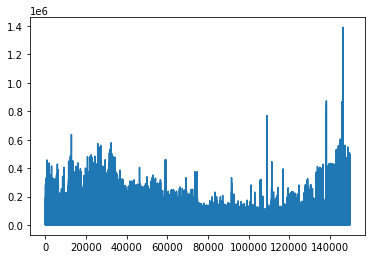

In [664]:
plt.plot(in_train0.reshape(-1))

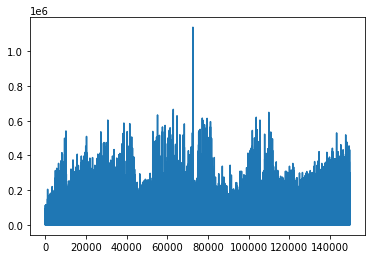

In [665]:
plt.plot(in_train1.reshape(-1))

In [666]:
print(np.shape(in_train0), np.shape(in_train1))

(480, 6, 52) (480, 6, 52)


In [667]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[1]: the goal is to read the file and save them in file_list
### input: the location of files
### output: a list consisting the name of all files 
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[1]

pp = pprint.PrettyPrinter()

paths =  ["Documents\database"]
#paths = ["Documents\Database\Melbourne\Pat1Train", "Documents\Database\Melbourne\Pat2Train", "Documents\Database\Melbourne\Pat3Train"]

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)
        
    # sort alphabetically
    file_list.sort()
    
    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)
    
    return file_list

In [668]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[3]: the goal is to separate preictal and iterictal files
### input: paths
### output: file_0: for interictal and file_1: for preictal
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[3]

files_0_test = []
files_1_test = []
##### for each path, it checks all files inside it
for path in paths:
    files = file_list(os.path.join(path, "*"), False)
##### separate the preictal and interictal files from related path
    for file in files:
        if("0.mat" in file):
            files_0_test.append(file)
        elif ("1.mat" in file):
            files_1_test.append(file)
        else:
            print(file, " has no class")

Documents\database\European  has no class
Documents\database\Pat_862  has no class


In [669]:
files

['Documents\\database\\European',
 'Documents\\database\\FR_862_1_46_0.mat',
 'Documents\\database\\FR_862_1_47_0.mat',
 'Documents\\database\\FR_862_1_48_0.mat',
 'Documents\\database\\FR_862_1_49_0.mat',
 'Documents\\database\\FR_862_1_50_0.mat',
 'Documents\\database\\FR_862_1_51_0.mat',
 'Documents\\database\\FR_862_1_52_0.mat',
 'Documents\\database\\FR_862_1_53_0.mat',
 'Documents\\database\\FR_862_1_54_0.mat',
 'Documents\\database\\FR_862_1_55_0.mat',
 'Documents\\database\\FR_862_3_sg_bw_1.mat',
 'Documents\\database\\Pat_862']

In [670]:
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### In[6]: the goal is to select the files for train and validation
### input: all files: files_0: all interictal files, files_1: all preictal files
### output: used_files_training_0: selected interictal files for train
### output: used_files_training_1: selected preictal files for train
### output: used_files_test_0: selected interictal files for test
### output: used_files_test_1: selected interictal files for test
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
############################################### In[6]

rng = default_rng()
print("Files with Label 0: ", len(files_0_test), "Files with Label 1: ", len(files_1_test))
min_size = np.min([len(files_0_test), len(files_1_test)])
#Number of files used from each type, for development
num_files_0_test = len(files_0_test)
num_files_1_test = len(files_1_test)

#choose 20 random files from each
sample_0_test = rng.choice(len(files_0_test), size=num_files_0_test, replace=False) # unique randoms
sample_1_test = rng.choice(len(files_1_test), size=num_files_1_test, replace=False) # unique randoms
################################
used_files_testing_0 = []  # for training
used_files_testing_1 = []  # for training

#### select the files based on the random numbers
#for ii in range(num_train_files):
    #used_files_training_0.append(files_0[sample_0[ii]])
    #used_files_training_1.append(files_1[sample_1[ii]])

for ii in range(num_files_0_test):
    used_files_testing_0.append(files_0_test[sample_0_test[ii]])


for ii in range(num_files_1_test):
    used_files_testing_1.append(files_1_test[sample_1_test[ii]])
    

print("Training files #: ", len(used_files_testing_1) + len(used_files_testing_0))


Files with Label 0:  10 Files with Label 1:  1
Training files #:  11


In [671]:
used_files_testing_0

['Documents\\database\\FR_862_1_55_0.mat',
 'Documents\\database\\FR_862_1_54_0.mat',
 'Documents\\database\\FR_862_1_46_0.mat',
 'Documents\\database\\FR_862_1_50_0.mat',
 'Documents\\database\\FR_862_1_51_0.mat',
 'Documents\\database\\FR_862_1_52_0.mat',
 'Documents\\database\\FR_862_1_53_0.mat',
 'Documents\\database\\FR_862_1_47_0.mat',
 'Documents\\database\\FR_862_1_48_0.mat',
 'Documents\\database\\FR_862_1_49_0.mat']

In [672]:
used_files_testing_1

['Documents\\database\\FR_862_3_sg_bw_1.mat']

In [673]:

num_test0 = num_files_0_test
num_test1 = num_files_1_test
#### train_input for CNN
in_test0 = read_data(used_files_testing_0,num_test0,fs, seg_len, num_sequence,seg_post, 0) ### inteictal train samples for CNN
in_test1 = read_data(used_files_testing_1,num_test1,fs, seg_len, num_sequence,seg_post, 1)  ### preictal train samples for CNN

#### test_input
#in_test0 = read_data(used_files_testing_0,num_test_files)
#in_test1 = read_data(used_files_testing_1,num_test_files)
#### train_out
#out_test0 = np.zeros((1,num_test_files)) ### interictal
#out_test1 = np.ones((1,num_test_files)) ### preictal
#### 
print('The size of inputs for interictal for CNN test:', np.shape(in_test0))
print('The size of inputs for preictal for CNN test:', np.shape(in_test1))


(230, 6, 52)
(350, 6, 52)
(460, 6, 52)
(580, 6, 52)
(690, 6, 52)
(810, 6, 52)
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
(910, 6, 52)
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     noise: 1
noise after subtraction   Flatline: 0     

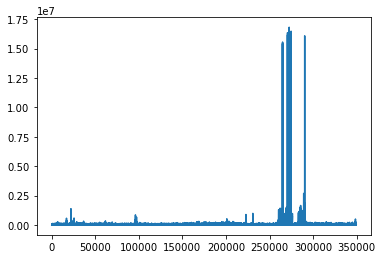

In [674]:
plt.plot(in_test0.reshape(-1))

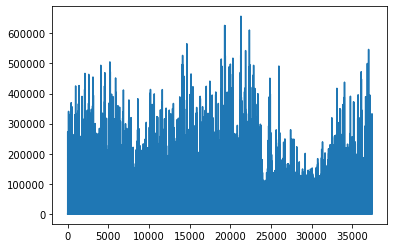

In [675]:
plt.plot(in_test1.reshape(-1))

In [676]:
#### https://machinelearningmastery.com/cnn-long-short-term-memory-networks/#:~:text=A%20CNN%20LSTM%20can%20be,the%20features%20across%20time%20steps.
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### Define input and output for train, validation, and test the net
###^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
### Train_Input (in this case, we do need shuffling in the train)
#train_cnn = np.zeros((in_train0.shape[0] + in_train1.shape[0], in_train0.shape[1], in_train0.shape[2]))
#train_cnn = np.concatenate((in_train0, in_train1), axis=0)
### Train_Output
#out_train0 = np.zeros((in_train0.shape[0]))
#out_train1 = np.ones((in_train1.shape[0]))
#out_train = np.concatenate((out_train0, out_train1), axis=0)

##### 
### Train_Input (in this case, we do not need shuffling in the train)
train_cnn = np.zeros((2*in_train1.shape[0], in_train0.shape[1], in_train0.shape[2]))
### Train_Output
out_train = np.zeros((train_cnn.shape[0]))
#out_train0 = np.zeros((in_train0.shape[0]))
#out_train1 = np.once((in_train1.shape[0]))
#### 
for ii in range (in_train1.shape[0]):
    train_cnn[2*ii,:, :] = in_train0[ii,:,:]
    train_cnn[2*ii+1,:, :] = in_train1[ii,:,:]
    #####
    #out_train[2*ii] = out_train0[2*ii]
    #out_train[2*ii+1] = out_train1[2*ii + 1]
    out_train[2*ii] = 0
    out_train[2*ii+1] = 1

### Test_Input
test_cnn = np.zeros((in_test0.shape[0] + in_test1.shape[0], in_test0.shape[1], in_test0.shape[2]))
test_cnn = np.concatenate((in_test0, in_test1), axis=0)
### Train_Output
out_test0 = np.zeros((in_test0.shape[0]))
out_test1 = np.ones((in_test1.shape[0]))
out_test = np.concatenate((out_test0, out_test1), axis=0)
######### 
xp_train = train_cnn.copy()
y_train = out_train.copy()
print("Train Size: ", np.shape(xp_train))

######### 
xp_test = test_cnn.copy()
y_test = out_test.copy()
print("Test Size: ", np.shape(xp_test))

####
#####for normaolozation NOTE: In the normalization, main values of x_test and train will be loaded
x_test = xp_test.copy()
x_train = xp_train.copy()




Train Size:  (960, 6, 52)
Test Size:  (1240, 6, 52)


In [677]:
print(np.shape(out_train))

(960,)


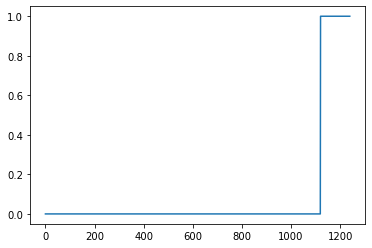

In [678]:
plt.plot(out_test)


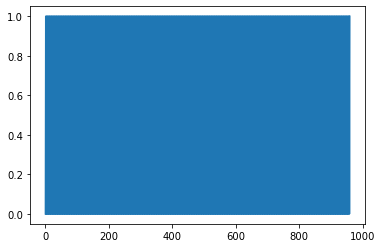

In [679]:
plt.plot(out_train)


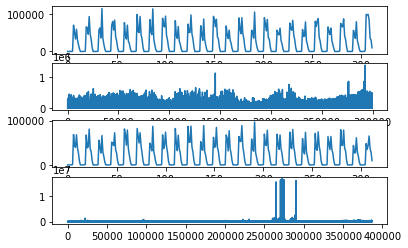

In [680]:

i = x_train.reshape(x_train.shape[0], -1)
i1 = x_train.reshape(-1)
####
p = test_cnn.reshape(test_cnn.shape[0], -1)
p1 = test_cnn.reshape(-1)
####
fig, axs = plt.subplots(4,1)
####
axs[0].plot(i[1])
axs[1].plot(i1)
####
axs[2].plot(p[1])
axs[3].plot(p1)



In [681]:
#### in this part, our goal is to prepare the data for LSTM. There are some ways that we can try: 
#### normalization (put the input (each segment) in the spacial range)
#### standarization: observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. 
 
#### https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/
from sklearn.preprocessing import StandardScaler
from pandas import Series
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn

#### normalize the dataset between 0 and 1
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler(feature_range=(0, 1))
##
for ii in range(xp_train.shape[0]):
    for jj in range(xp_train.shape[1]):
        dataset = xp_train[ii,jj,:].copy()
        #####
        dataset1 = dataset.reshape(-1,1)
        #scaler = MinMaxScaler(feature_range=(0, 1))   ### first methode
        scaler = StandardScaler()     ### second methode
        #####
        scaler = scaler.fit(dataset1)    ### we need it for the first and second stage 
        ####
        #scaler = preprocessing.StandardScaler().fit(dataset1)   #### third methode
        dataset2 = scaler.transform(dataset1)
        #dataset2  = sklearn.preprocessing.robust_scale(dataset1, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
##        #plt.plot(dataset2)
        x_train[ii,jj,:] = dataset2[:,0]


###############
### my method for normalization
#for ii in range(xp_train.shape[0]):
#    for jj in range(xp_train.shape[1]):
#        dataset = xp_train[ii,jj,:].copy()
        ##########
#        b_rang = max(dataset)/100000
#        a_rang = 0
#        a_max = np.max(dataset)
#        a_min = np.min(dataset)
#        ######
#        b_ranged = ((b_rang-a_rang)/(a_max - a_min))*dataset + ((a_rang*a_max)-(b_rang*a_min))/(a_max - a_min)
#        #########
#        dataset2 = b_ranged
##        #plt.plot(dataset2)
#        x_train[ii,jj,:] = dataset2

In [682]:
#### in this part, our goal is to prepare the data for LSTM. There are some ways that we can try: 
#### normalization (put the input (each segment) in the spacial range)
#### standarization: observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. 
 
#### https://machinelearningmastery.com/how-to-scale-data-for-long-short-term-memory-networks-in-python/
from sklearn.preprocessing import StandardScaler
from pandas import Series
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn

#### normalize the dataset between 0 and 1
#scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler(feature_range=(0, 1))
##
for ii in range(xp_test.shape[0]):
    for jj in range(xp_test.shape[1]):
        dataset = xp_test[ii,jj,:].copy()
        #####
        dataset1 = dataset.reshape(-1,1)
        #scaler = MinMaxScaler(feature_range=(0, 1))   ### first methode
        scaler = StandardScaler()     ### second methode
        #####
        scaler = scaler.fit(dataset1)    ### we need it for the first and second stage 
        ####
        #scaler = preprocessing.StandardScaler().fit(dataset1)   #### third methode
        dataset2 = scaler.transform(dataset1)
        #dataset2  = sklearn.preprocessing.robust_scale(dataset1, axis=0, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
##        #plt.plot(dataset2)
        x_test[ii,jj,:] = dataset2[:,0]


###############
### my method for normalization
#for ii in range(xp_train.shape[0]):
#    for jj in range(xp_train.shape[1]):
#        dataset = xp_train[ii,jj,:].copy()
        ##########
#        b_rang = max(dataset)/100000
#        a_rang = 0
#        a_max = np.max(dataset)
#        a_min = np.min(dataset)
#        ######
#        b_ranged = ((b_rang-a_rang)/(a_max - a_min))*dataset + ((a_rang*a_max)-(b_rang*a_min))/(a_max - a_min)
#        #########
#        dataset2 = b_ranged
##        #plt.plot(dataset2)
#        x_train[ii,jj,:] = dataset2

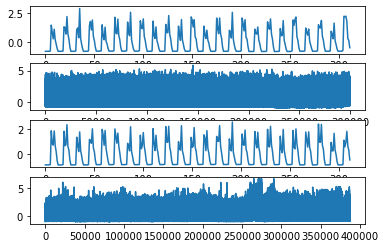

In [683]:

i = x_train.reshape(x_train.shape[0], -1)
i1 = x_train.reshape(-1)
####
p = x_test.reshape(test_cnn.shape[0], -1)
p1 = x_test.reshape(-1)

####
fig, axs = plt.subplots(4,1)
####
axs[0].plot(i[1])
axs[1].plot(i1)
####
axs[2].plot(p[1])
axs[3].plot(p1)



In [684]:
patient_s = 100
epoch_s = 150
#####
patient_l = 350
epoch_l = 500

In [685]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience= patient_s, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/150


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/30 [============================>.] - ETA: 0s - loss: 0.6793 - accuracy: 0.6530
Epoch 1: accuracy improved from -inf to 0.65312, saving model to best_model.h5
30/30 [==============================] - 2s 11ms/step - loss: 0.6792 - accuracy: 0.6531
Epoch 2/150
29/30 [============================>.] - ETA: 0s - loss: 0.5799 - accuracy: 0.7683
Epoch 2: accuracy improved from 0.65312 to 0.76771, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.5792 - accuracy: 0.7677
Epoch 3/150
25/30 [========================>.....] - ETA: 0s - loss: 0.4844 - accuracy: 0.7775
Epoch 3: accuracy improved from 0.76771 to 0.76875, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4923 - accuracy: 0.7688
Epoch 4/150
23/30 [======================>.......] - ETA: 0s - loss: 0.4439 - accuracy: 0.8043
Epoch 4: accuracy improved from 0.76875 to 0.79167, saving model to best_model.h5
30/30 [==============================] - 0s 8

30/30 [==============================] - 0s 7ms/step - loss: 0.1561 - accuracy: 0.9333
Epoch 34/150
23/30 [======================>.......] - ETA: 0s - loss: 0.1146 - accuracy: 0.9592
Epoch 34: accuracy improved from 0.94792 to 0.95312, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.1268 - accuracy: 0.9531
Epoch 35/150
25/30 [========================>.....] - ETA: 0s - loss: 0.1375 - accuracy: 0.9488
Epoch 35: accuracy did not improve from 0.95312
30/30 [==============================] - 0s 7ms/step - loss: 0.1390 - accuracy: 0.9469
Epoch 36/150
25/30 [========================>.....] - ETA: 0s - loss: 0.1167 - accuracy: 0.9563
Epoch 36: accuracy improved from 0.95312 to 0.95833, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.1121 - accuracy: 0.9583
Epoch 37/150
24/30 [=======================>......] - ETA: 0s - loss: 0.1237 - accuracy: 0.9479
Epoch 37: accuracy did not improve from 0.95833
30/30 

24/30 [=======================>......] - ETA: 0s - loss: 0.0828 - accuracy: 0.9674
Epoch 68: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 7ms/step - loss: 0.0833 - accuracy: 0.9635
Epoch 69/150
24/30 [=======================>......] - ETA: 0s - loss: 0.0869 - accuracy: 0.9701
Epoch 69: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 7ms/step - loss: 0.0806 - accuracy: 0.9729
Epoch 70/150
23/30 [======================>.......] - ETA: 0s - loss: 0.0974 - accuracy: 0.9606
Epoch 70: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 7ms/step - loss: 0.0837 - accuracy: 0.9656
Epoch 71/150
30/30 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9625
Epoch 71: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 7ms/step - loss: 0.1040 - accuracy: 0.9625
Epoch 72/150
26/30 [=========================>....] - ETA: 0s - loss: 0.0935 - accuracy: 

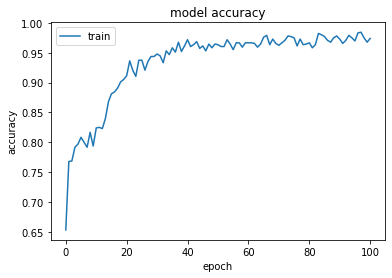

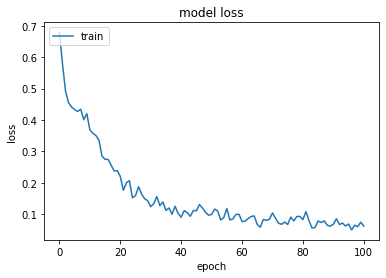

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_136 (LSTM)             (None, 6, 16)             4416      
                                                                 
 lstm_137 (LSTM)             (None, 16)                2112      
                                                                 
 dense_136 (Dense)           (None, 30)                510       
                                                                 
 dense_137 (Dense)           (None, 1)                 31        
                                                                 
Total params: 7,069
Trainable params: 7,069
Non-trainable params: 0
_________________________________________________________________


In [686]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()
#model0.add(BatchNormalization())
model0.add((LSTM(units=16, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.3)))
#model0.add(BatchNormalization())
#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=30, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 
history = model0.fit(x_train, y_train, epochs= epoch_s, callbacks=[es, mc])

#history = model0.fit(x_train, y_train, epochs= 150, callbacks=[es, mc], batch_size = 10)
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 1.0    FPR_ave: 0.017857142857142905    Accuracy_ave: 0.9838709677419355    AUC_ave: 0.9985119047619048

 Results for mean method:   Sen_md 1.0    FPR_md: 0.0625    Accuracy_md: 0.9435483870967742    AUC_md: 0.9546130952380952

 Results for k-of-N:   Sen_kn 0.9166666666666666    FPR_kn: 0.017857142857142905    Accuracy_kn: 0.9758064516129032    AUC_kn: 0.9494047619047619


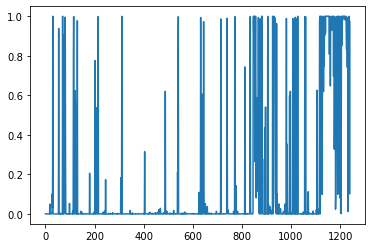

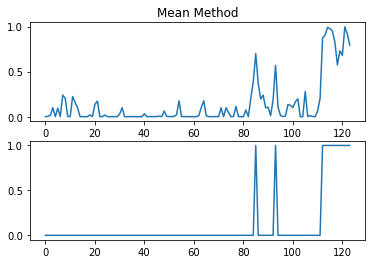

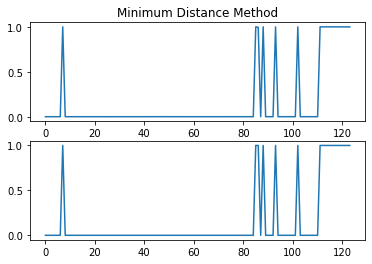

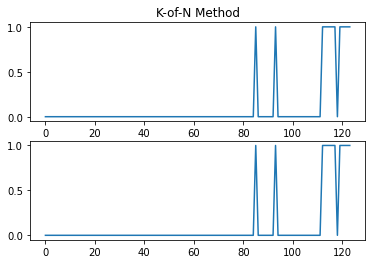

In [687]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,"   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [688]:
print(y_hat_first)

[[6.2484358e-04]
 [2.2487601e-04]
 [5.2405965e-05]
 ...
 [9.9916255e-01]
 [1.0117189e-01]
 [9.7303426e-01]]


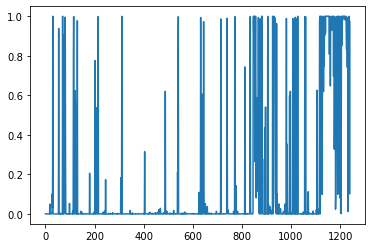

In [689]:
plt.plot(y_hat_first)

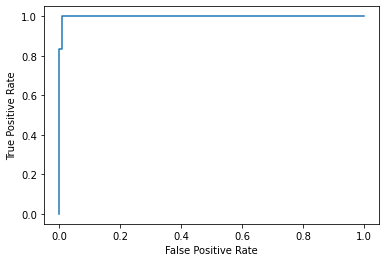

In [690]:
##### Example of plotting the ROC CUREVE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ =  metrics.roc_curve( y_test_mean_ave,y_hat_ave)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [691]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
110 num_zeros_post 14 num_one_post    SUM: 124
14 num_one_post
0 12 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
105 num_zeros_post 19 num_one_post    SUM: 124
0 12 12 num_main_one
105 7 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
111 num_zeros_post 13 num_one_post    SUM: 124
1 11 12 num_main_one
110 2 112 num_main_zeros
124 all


In [692]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=400, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_l, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/30 [==========================>...] - ETA: 0s - loss: 0.6698 - accuracy: 0.6192
Epoch 1: accuracy improved from -inf to 0.62292, saving model to best_model.h5
30/30 [==============================] - 3s 11ms/step - loss: 0.6666 - accuracy: 0.6229
Epoch 2/500
24/30 [=======================>......] - ETA: 0s - loss: 0.5574 - accuracy: 0.7422
Epoch 2: accuracy improved from 0.62292 to 0.75833, saving model to best_model.h5
30/30 [==============================] - 0s 10ms/step - loss: 0.5386 - accuracy: 0.7583
Epoch 3/500
28/30 [===========================>..] - ETA: 0s - loss: 0.3360 - accuracy: 0.8806
Epoch 3: accuracy improved from 0.75833 to 0.87813, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.3356 - accuracy: 0.8781
Epoch 4/500
28/30 [===========================>..] - ETA: 0s - loss: 0.1979 - accuracy: 0.9275
Epoch 4: accuracy improved from 0.87813 to 0.92604, saving model to best_model.h5
30/30 [==============================] - 0s 

30/30 [==============================] - 0s 10ms/step - loss: 0.0283 - accuracy: 0.9896
Epoch 35/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0520 - accuracy: 0.9821
Epoch 35: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 8ms/step - loss: 0.0495 - accuracy: 0.9833
Epoch 36/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0326 - accuracy: 0.9888
Epoch 36: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9885
Epoch 37/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0473 - accuracy: 0.9838
Epoch 37: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 8ms/step - loss: 0.0438 - accuracy: 0.9854
Epoch 38/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9919
Epoch 38: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 8ms/step - loss: 0.0289 - accur

30/30 [==============================] - 0s 8ms/step - loss: 0.0317 - accuracy: 0.9917
Epoch 70/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0245 - accuracy: 0.9896
Epoch 70: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 9ms/step - loss: 0.0334 - accuracy: 0.9875
Epoch 71/500
29/30 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9849
Epoch 71: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0462 - accuracy: 0.9844
Epoch 72/500
30/30 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9865
Epoch 72: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0374 - accuracy: 0.9865
Epoch 73/500
29/30 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9892
Epoch 73: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0379 - accura

Epoch 105/500
30/30 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9917
Epoch 105: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.9917
Epoch 106/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0122 - accuracy: 0.9959
Epoch 106: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 107/500
30/30 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9927
Epoch 107: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 108/500
29/30 [============================>.] - ETA: 0s - loss: 0.0115 - accuracy: 0.9957
Epoch 108: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9958
Epoch 109/500
23/30 [======================>.......] - ETA: 0s - los

29/30 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9935
Epoch 140: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9927
Epoch 141/500
29/30 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9978
Epoch 141: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 0.9979
Epoch 142/500
30/30 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9927
Epoch 142: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0254 - accuracy: 0.9927
Epoch 143/500
29/30 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9925
Epoch 143: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0164 - accuracy: 0.9927
Epoch 144/500
29/30 [============================>.] - ETA: 0s - loss: 0.0184 - ac

29/30 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9968
Epoch 175: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9969
Epoch 176/500
29/30 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9946
Epoch 176: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9948
Epoch 177/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0107 - accuracy: 0.9955
Epoch 177: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0105 - accuracy: 0.9958
Epoch 178/500
29/30 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9978
Epoch 178: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.9979
Epoch 179/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0167 - ac

28/30 [===========================>..] - ETA: 0s - loss: 0.0264 - accuracy: 0.9911
Epoch 210: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.9906
Epoch 211/500
29/30 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9978
Epoch 211: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0068 - accuracy: 0.9979
Epoch 212/500
29/30 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9989
Epoch 212: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 213/500
29/30 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9935
Epoch 213: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0226 - accuracy: 0.9937
Epoch 214/500
30/30 [==============================] - ETA: 0s - loss: 0.0388 - ac

26/30 [=========================>....] - ETA: 0s - loss: 0.0354 - accuracy: 0.9868
Epoch 245: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9885
Epoch 246/500
30/30 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 0.9917
Epoch 246: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.9917
Epoch 247/500
29/30 [============================>.] - ETA: 0s - loss: 0.0194 - accuracy: 0.9935
Epoch 247: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 248/500
29/30 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9989
Epoch 248: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.9990
Epoch 249/500
29/30 [============================>.] - ETA: 0s - loss: 0.0113 - ac

28/30 [===========================>..] - ETA: 0s - loss: 0.0112 - accuracy: 0.9967
Epoch 280: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 281/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 281: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 282/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000
Epoch 282: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 283/500
29/30 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9989
Epoch 283: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 0.9990
Epoch 284/500
29/30 [============================>.] - ETA: 0s - loss: 0.0063 - ac

29/30 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9957
Epoch 315: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.9958
Epoch 316/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0207 - accuracy: 0.9928
Epoch 316: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 317/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0052 - accuracy: 0.9989
Epoch 317: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 318/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 318: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.9990
Epoch 319/500
29/30 [============================>.] - ETA: 0s - loss: 0.0064 - ac

30/30 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9969
Epoch 350: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 0.9969
Epoch 351/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0106 - accuracy: 0.9961
Epoch 351: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9969
Epoch 351: early stopping


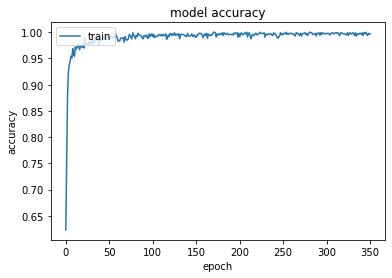

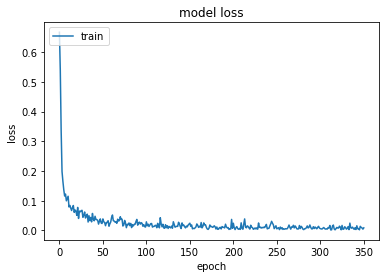

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_7 (Batc  (32, 6, 52)              208       
 hNormalization)                                                 
                                                                 
 lstm_138 (LSTM)             (32, 6, 16)               4416      
                                                                 
 lstm_139 (LSTM)             (32, 16)                  2112      
                                                                 
 dense_138 (Dense)           (32, 30)                  510       
                                                                 
 dense_139 (Dense)           (32, 1)                   31        
                                                                 
Total params: 7,277
Trainable params: 7,173
Non-trainable params: 104
_________________________________________________

In [693]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()
model0.add(BatchNormalization())
model0.add((LSTM(units=16, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.3)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))

model0.add(Dense(units=30, activation = "swish"))
#model0.add(BatchNormalization())
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#model0.add(BatchNormalization())
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 
history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])

#history = model0.fit(x_train, y_train, epochs= 500,  batch_size = 10)
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.75    FPR_ave: 0.0267857142857143    Accuracy_ave: 0.9516129032258065    AUC_ave: 0.9873511904761905

 Results for mean method:   Sen_md 0.75    FPR_md: 0.0267857142857143    Accuracy_md: 0.9516129032258065    AUC_md: 0.9598214285714286

 Results for k-of-N:   Sen_kn 0.75    FPR_kn: 0.017857142857142905    Selectivity_kn: 0.8181818181818182    Accuracy_kn: 0.9596774193548387    AUC_kn: 0.8660714285714286


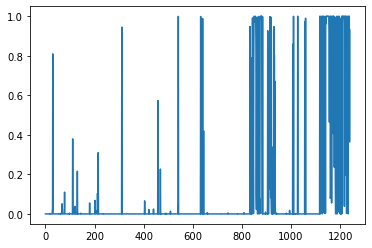

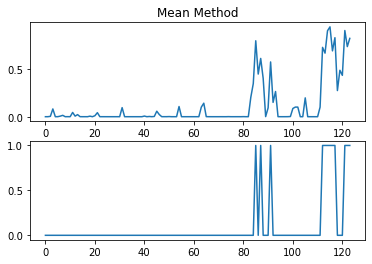

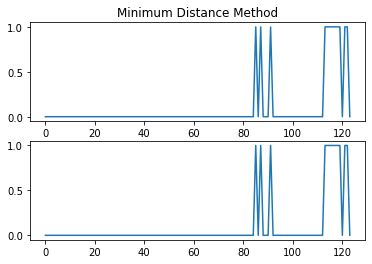

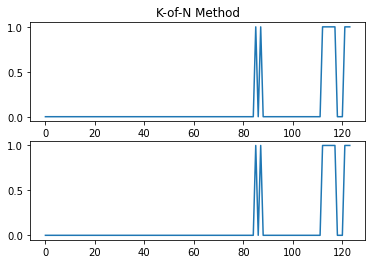

In [694]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn, "   Selectivity_kn:", Sel_kn, "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [695]:
for ii in range(len(y_hat_first)):
    print(y_hat_first[ii])

[0.00017822]
[3.0151881e-05]
[5.3531977e-08]
[1.1415492e-07]
[3.966726e-07]
[2.5860857e-08]
[6.6093785e-06]
[6.739619e-07]
[4.0688556e-06]
[1.3431257e-06]
[1.5455446e-06]
[7.704591e-08]
[8.442315e-08]
[5.875706e-08]
[7.568899e-08]
[5.1201035e-08]
[4.601522e-06]
[7.689969e-06]
[0.00163711]
[1.4913165e-06]
[1.6127082e-07]
[3.2772104e-07]
[7.5423947e-07]
[3.3949575e-06]
[4.7854733e-06]
[1.3788291e-05]
[7.924946e-06]
[0.00010927]
[0.00665164]
[0.03022221]
[0.8095083]
[4.4992376e-08]
[1.2351204e-07]
[2.6476044e-05]
[2.3725272e-06]
[2.0108482e-06]
[3.9743586e-08]
[1.2081254e-07]
[3.1025666e-05]
[5.1038453e-05]
[6.1858195e-08]
[2.8432711e-07]
[4.0336946e-07]
[1.1780373e-05]
[4.3535865e-06]
[1.0957948e-06]
[7.636312e-08]
[1.1927006e-07]
[5.0515075e-07]
[1.3526359e-08]
[6.651369e-08]
[2.0972495e-05]
[2.1103774e-06]
[3.3618576e-08]
[0.00080847]
[0.00141541]
[0.00010276]
[0.00056297]
[5.161971e-05]
[0.00044344]
[1.5847989e-05]
[0.00247406]
[6.609436e-05]
[0.00025224]
[1.2923196e-06]
[0.00011097]


[0.01840846]
[0.3379435]
[0.34474003]
[0.0023101]
[0.7515456]
[0.999788]
[0.99932444]
[0.99853814]
[0.98252064]
[0.97131944]
[0.9857562]
[0.9997819]
[0.9957124]
[0.85987777]
[0.09927972]
[0.02235839]
[0.46146765]
[0.992664]
[0.50396734]
[0.00010314]
[4.851454e-05]
[1.2934469e-05]
[4.562888e-06]
[0.9989674]
[0.9355628]
[0.5509702]
[0.01184672]
[0.00164526]
[0.07620218]
[0.00098232]
[0.99678576]
[0.99973637]
[0.98837143]
[0.9999044]
[0.99980515]
[0.99850154]
[0.9998568]
[0.9987834]
[0.9994665]
[0.00045569]
[0.9980736]
[1.2264209e-06]
[1.5437504e-06]
[5.306056e-07]
[4.6775256e-07]
[3.6795925e-06]
[5.3573854e-07]
[4.926191e-07]
[1.1546183e-06]
[5.400197e-07]
[3.4872858e-06]
[5.553422e-07]
[0.00941019]
[1.9759325e-06]
[4.4816256e-06]
[3.1272093e-06]
[4.2600323e-07]
[2.6316005e-07]
[3.3979697e-06]
[4.0023177e-05]
[4.236225e-06]
[0.9264555]
[1.3234917e-07]
[3.3830722e-07]
[0.00017108]
[6.7186403e-07]
[0.4328153]
[0.12603833]
[0.82331204]
[0.81409717]
[0.9976815]
[0.37616333]
[0.9949005]
[0.08

In [696]:
for ii in range(len(y_hat_kn)):
    print(y_hat_kn[ii])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0


In [697]:
for ii in range(len(y_hat_md)):
    print(y_hat_md[ii])

2.5860856567305746e-08
5.120103452327385e-08
1.612708189213663e-07
3.9743586199847414e-08
1.352635869977803e-08
3.3618576367189235e-08
1.2923195527037024e-06
2.359355733005941e-08
3.1438395353688975e-07
9.050408777966368e-08
2.5016152704893102e-08
5.397274890128756e-06
1.0673337783373427e-05
3.8702532378920296e-07
5.278437811284675e-07
1.567238427924167e-07
1.0746621370572029e-07
8.938265949609558e-08
5.580391970738674e-08
3.406069382094756e-08
1.5058945791679434e-05
3.6449839058150246e-07
3.5218496918787423e-07
3.163038115872041e-07
5.660221518155595e-07
1.0520948734438207e-07
8.155762998285354e-07
8.338698762599961e-07
5.9061651569436435e-08
9.788849553160617e-08
6.707143285211714e-08
3.3844269609062394e-08
3.40134960197247e-08
5.0444651122916184e-08
5.004597269930855e-08
6.646398276188847e-08
7.804276691558698e-08
1.3747090576998744e-07
9.714932502902229e-08
1.475501818504199e-07
5.5528605713561774e-08
1.4259053671139554e-07
1.6216547749081656e-07
2.8758293524333567e-07
5.5747801752

In [698]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
12 num_one_post
3 9 12 num_main_one
109 3 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
3 9 12 num_main_one
109 3 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
113 num_zeros_post 11 num_one_post    SUM: 124
3 9 12 num_main_one
110 2 112 num_main_zeros
124 all


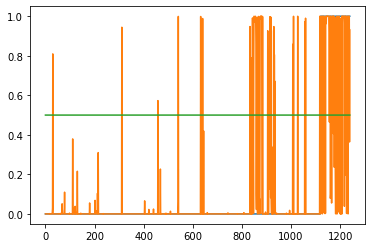

In [699]:
plt.plot(y_test)
plt.plot(y_hat_first)
plt.plot((np.ones(len(y_test)))/2)
plt.show()

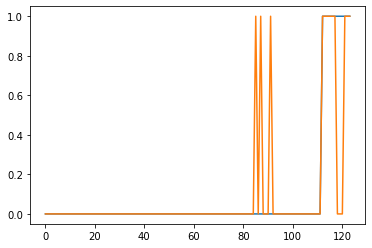

In [700]:

plt.plot(y_test_mean_ave)
plt.plot(y_bin_ave)

plt.show()

In [701]:
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md + TP_md, "num_main_one")
print(TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")

(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
12 num_main_one
112 num_main_zeros
124 all


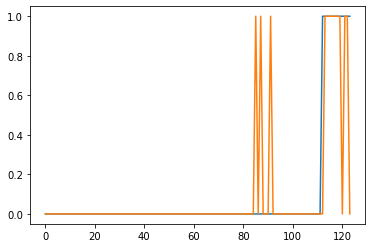

In [702]:

plt.plot(y_test_mean_md)
plt.plot(y_bin_md)

plt.show()

In [703]:
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn + TP_kn, "num_main_one")
print(TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

(1240, 1) out_size
(124,) out_post
113 num_zeros_post 11 num_one_post    SUM: 124
12 num_main_one
112 num_main_zeros
124 all


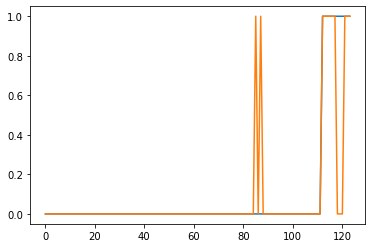

In [704]:
plt.plot(y_test_mean_kn)
plt.plot(y_bin_kn)

plt.show()

In [705]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=50, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_s, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


29/30 [============================>.] - ETA: 0s - loss: 0.6244 - accuracy: 0.7004
Epoch 1: accuracy improved from -inf to 0.70417, saving model to best_model.h5
30/30 [==============================] - 3s 14ms/step - loss: 0.6200 - accuracy: 0.7042
Epoch 2/500
30/30 [==============================] - ETA: 0s - loss: 0.4829 - accuracy: 0.7552
Epoch 2: accuracy improved from 0.70417 to 0.75521, saving model to best_model.h5
30/30 [==============================] - 0s 13ms/step - loss: 0.4829 - accuracy: 0.7552
Epoch 3/500
26/30 [=========================>....] - ETA: 0s - loss: 0.4305 - accuracy: 0.7921
Epoch 3: accuracy improved from 0.75521 to 0.79479, saving model to best_model.h5
30/30 [==============================] - 0s 13ms/step - loss: 0.4250 - accuracy: 0.7948
Epoch 4/500
26/30 [=========================>....] - ETA: 0s - loss: 0.3755 - accuracy: 0.8329
Epoch 4: accuracy improved from 0.79479 to 0.82292, saving model to best_model.h5
30/30 [==============================] - 0s

26/30 [=========================>....] - ETA: 0s - loss: 0.0913 - accuracy: 0.9675
Epoch 34: accuracy did not improve from 0.96979
30/30 [==============================] - 0s 7ms/step - loss: 0.0910 - accuracy: 0.9677
Epoch 35/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0813 - accuracy: 0.9727
Epoch 35: accuracy improved from 0.96979 to 0.97083, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.0831 - accuracy: 0.9708
Epoch 36/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0836 - accuracy: 0.9592
Epoch 36: accuracy did not improve from 0.97083
30/30 [==============================] - 0s 7ms/step - loss: 0.0825 - accuracy: 0.9615
Epoch 37/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0875 - accuracy: 0.9675
Epoch 37: accuracy did not improve from 0.97083
30/30 [==============================] - 0s 7ms/step - loss: 0.0877 - accuracy: 0.9667
Epoch 38/500
25/30 [========================>.....] - 

30/30 [==============================] - 0s 9ms/step - loss: 0.0552 - accuracy: 0.9812
Epoch 69/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0464 - accuracy: 0.9866
Epoch 69: accuracy did not improve from 0.98333
30/30 [==============================] - 0s 8ms/step - loss: 0.0506 - accuracy: 0.9833
Epoch 70/500
29/30 [============================>.] - ETA: 0s - loss: 0.0640 - accuracy: 0.9784
Epoch 70: accuracy did not improve from 0.98333
30/30 [==============================] - 0s 8ms/step - loss: 0.0629 - accuracy: 0.9792
Epoch 71/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0545 - accuracy: 0.9810
Epoch 71: accuracy did not improve from 0.98333
30/30 [==============================] - 0s 8ms/step - loss: 0.0537 - accuracy: 0.9812
Epoch 72/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0408 - accuracy: 0.9866
Epoch 72: accuracy improved from 0.98333 to 0.98438, saving model to best_model.h5
30/30 [==============================] - 

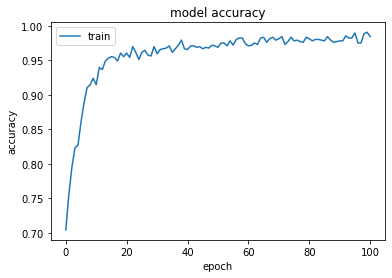

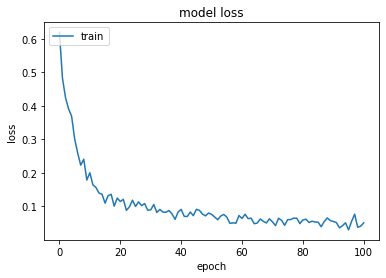

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_140 (LSTM)             (None, 6, 32)             10880     
                                                                 
 lstm_141 (LSTM)             (None, 32)                8320      
                                                                 
 dense_140 (Dense)           (None, 50)                1650      
                                                                 
 dense_141 (Dense)           (None, 1)                 51        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [706]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=32, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 32, return_sequences=False, dropout = 0.3)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=50, activation = "swish"))
model0.add(Dense(units=1, activation = "sigmoid"))
#model0.add(Dense(units=50, activation = "relu"))
#model0.add(Dense(units=1, activation = "swish"))
######### I have comment this part (it is for relu-sigmoid)
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################

###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.75    FPR_ave: 0.008928571428571397    Accuracy_ave: 0.967741935483871    AUC_ave: 0.988095238095238

 Results for mean method:   Sen_md 0.8333333333333334    FPR_md: 0.017857142857142905    Accuracy_md: 0.967741935483871    AUC_md: 0.9895833333333333

 Results for k-of-N:   Sen_kn 0.6666666666666666    FPR_kn: 0.017857142857142905    Selectivity_kn: 0.8    Accuracy_kn: 0.9516129032258065    AUC_kn: 0.8244047619047618


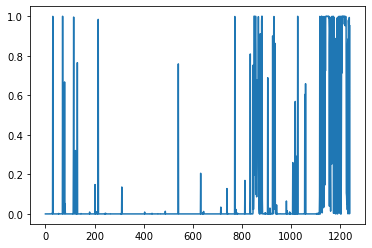

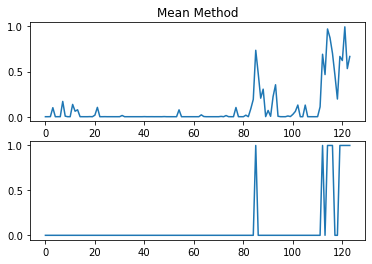

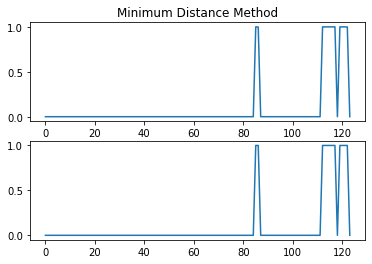

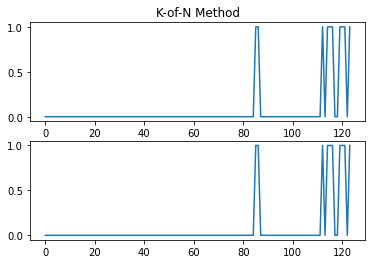

In [707]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn, "   Selectivity_kn:", Sel_kn, "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [708]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
114 num_zeros_post 10 num_one_post    SUM: 124
10 num_one_post
3 9 12 num_main_one
111 1 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
2 10 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
114 num_zeros_post 10 num_one_post    SUM: 124
4 8 12 num_main_one
110 2 112 num_main_zeros
124 all


In [709]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=350, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_l, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


28/30 [===========================>..] - ETA: 0s - loss: 0.6701 - accuracy: 0.6228
Epoch 1: accuracy improved from -inf to 0.63229, saving model to best_model.h5
30/30 [==============================] - 3s 11ms/step - loss: 0.6657 - accuracy: 0.6323
Epoch 2/500
24/30 [=======================>......] - ETA: 0s - loss: 0.5549 - accuracy: 0.7201
Epoch 2: accuracy improved from 0.63229 to 0.72083, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.5428 - accuracy: 0.7208
Epoch 3/500
24/30 [=======================>......] - ETA: 0s - loss: 0.4508 - accuracy: 0.7630
Epoch 3: accuracy improved from 0.72083 to 0.76354, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4512 - accuracy: 0.7635
Epoch 4/500
24/30 [=======================>......] - ETA: 0s - loss: 0.3970 - accuracy: 0.8112
Epoch 4: accuracy improved from 0.76354 to 0.81563, saving model to best_model.h5
30/30 [==============================] - 0s 8

Epoch 34/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0679 - accuracy: 0.9779
Epoch 34: accuracy did not improve from 0.97188
30/30 [==============================] - 0s 7ms/step - loss: 0.0746 - accuracy: 0.9708
Epoch 35/500
30/30 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9583
Epoch 35: accuracy did not improve from 0.97188
30/30 [==============================] - 0s 7ms/step - loss: 0.1057 - accuracy: 0.9583
Epoch 36/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0888 - accuracy: 0.9715
Epoch 36: accuracy did not improve from 0.97188
30/30 [==============================] - 0s 7ms/step - loss: 0.0885 - accuracy: 0.9719
Epoch 37/500
30/30 [==============================] - ETA: 0s - loss: 0.0775 - accuracy: 0.9740
Epoch 37: accuracy improved from 0.97188 to 0.97396, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.0775 - accuracy: 0.9740
Epoch 38/500
25/30 [=====================

25/30 [========================>.....] - ETA: 0s - loss: 0.0658 - accuracy: 0.9762
Epoch 69: accuracy did not improve from 0.98229
30/30 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9740
Epoch 70/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0571 - accuracy: 0.9800
Epoch 70: accuracy did not improve from 0.98229
30/30 [==============================] - 0s 7ms/step - loss: 0.0560 - accuracy: 0.9792
Epoch 71/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0481 - accuracy: 0.9792
Epoch 71: accuracy did not improve from 0.98229
30/30 [==============================] - 0s 7ms/step - loss: 0.0448 - accuracy: 0.9802
Epoch 72/500
30/30 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9833
Epoch 72: accuracy improved from 0.98229 to 0.98333, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.0588 - accuracy: 0.9833
Epoch 73/500
25/30 [========================>.....] - 

25/30 [========================>.....] - ETA: 0s - loss: 0.0456 - accuracy: 0.9825
Epoch 104: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0442 - accuracy: 0.9823
Epoch 105/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0603 - accuracy: 0.9796
Epoch 105: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0513 - accuracy: 0.9833
Epoch 106/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0309 - accuracy: 0.9900
Epoch 106: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0330 - accuracy: 0.9896
Epoch 107/500
30/30 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9792
Epoch 107: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0461 - accuracy: 0.9792
Epoch 108/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0387 - ac

26/30 [=========================>....] - ETA: 0s - loss: 0.0324 - accuracy: 0.9856
Epoch 139: accuracy did not improve from 0.99167
30/30 [==============================] - 0s 8ms/step - loss: 0.0341 - accuracy: 0.9854
Epoch 140/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0399 - accuracy: 0.9838
Epoch 140: accuracy did not improve from 0.99167
30/30 [==============================] - 0s 8ms/step - loss: 0.0389 - accuracy: 0.9833
Epoch 141/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0501 - accuracy: 0.9873
Epoch 141: accuracy did not improve from 0.99167
30/30 [==============================] - 0s 8ms/step - loss: 0.0481 - accuracy: 0.9875
Epoch 142/500
30/30 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9844
Epoch 142: accuracy did not improve from 0.99167
30/30 [==============================] - 0s 8ms/step - loss: 0.0546 - accuracy: 0.9844
Epoch 143/500
30/30 [==============================] - ETA: 0s - loss: 0.0292 - ac

Epoch 174/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0234 - accuracy: 0.9900
Epoch 174: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0210 - accuracy: 0.9917
Epoch 175/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9925
Epoch 175: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0282 - accuracy: 0.9906
Epoch 176/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0701 - accuracy: 0.9754
Epoch 176: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 8ms/step - loss: 0.0674 - accuracy: 0.9760
Epoch 177/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0338 - accuracy: 0.9900
Epoch 177: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0334 - accuracy: 0.9906
Epoch 178/500
24/30 [=======================>......] - ETA: 0s - los

27/30 [==========================>...] - ETA: 0s - loss: 0.0311 - accuracy: 0.9873
Epoch 209: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 8ms/step - loss: 0.0289 - accuracy: 0.9885
Epoch 210/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0222 - accuracy: 0.9892
Epoch 210: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 9ms/step - loss: 0.0213 - accuracy: 0.9906
Epoch 211/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0514 - accuracy: 0.9844
Epoch 211: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 8ms/step - loss: 0.0486 - accuracy: 0.9854
Epoch 212/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0266 - accuracy: 0.9900
Epoch 212: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 8ms/step - loss: 0.0250 - accuracy: 0.9906
Epoch 213/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0075 - ac

26/30 [=========================>....] - ETA: 0s - loss: 0.0307 - accuracy: 0.9856
Epoch 244: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 9ms/step - loss: 0.0316 - accuracy: 0.9844
Epoch 245/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0531 - accuracy: 0.9808
Epoch 245: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 8ms/step - loss: 0.0559 - accuracy: 0.9771
Epoch 246/500
30/30 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9833
Epoch 246: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 8ms/step - loss: 0.0472 - accuracy: 0.9833
Epoch 247/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0366 - accuracy: 0.9855
Epoch 247: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 8ms/step - loss: 0.0346 - accuracy: 0.9865
Epoch 248/500
29/30 [============================>.] - ETA: 0s - loss: 0.0098 - ac

28/30 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9922
Epoch 279: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0230 - accuracy: 0.9917
Epoch 280/500
30/30 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9979
Epoch 280: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.9979
Epoch 281/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0193 - accuracy: 0.9959
Epoch 281: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0213 - accuracy: 0.9958
Epoch 282/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0213 - accuracy: 0.9909
Epoch 282: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9917
Epoch 283/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0189 - ac

30/30 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9937
Epoch 314: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 315/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0114 - accuracy: 0.9944
Epoch 315: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9937
Epoch 316/500
29/30 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9946
Epoch 316: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 317/500
30/30 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9937
Epoch 317: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 318/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0151 - ac

29/30 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9925
Epoch 349: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.9927
Epoch 350/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0144 - accuracy: 0.9948
Epoch 350: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 351/500
30/30 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9937
Epoch 351: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 351: early stopping


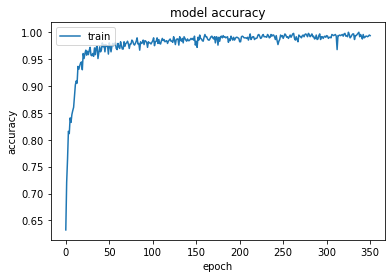

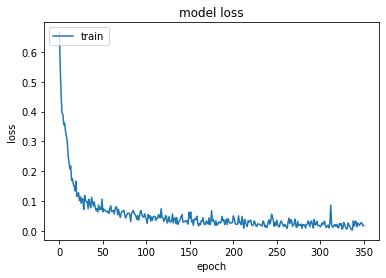

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_142 (LSTM)             (None, 6, 32)             10880     
                                                                 
 lstm_143 (LSTM)             (None, 32)                8320      
                                                                 
 dense_142 (Dense)           (None, 50)                1650      
                                                                 
 dense_143 (Dense)           (None, 1)                 51        
                                                                 
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


In [710]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=32, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 32, return_sequences=False, dropout = 0.3)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=50, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.9166666666666666    FPR_ave: 0.0267857142857143    Accuracy_ave: 0.967741935483871    AUC_ave: 0.984375

 Results for mean method:   Sen_md 0.9166666666666666    FPR_md: 0.0714285714285714    Accuracy_md: 0.9274193548387096    AUC_md: 0.9375

 Results for k-of-N:   Sen_kn 0.9166666666666666    FPR_kn: 0.0267857142857143    Accuracy_kn: 0.967741935483871    AUC_kn: 0.944940476190476


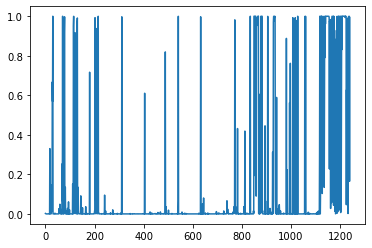

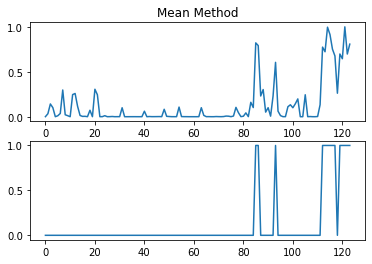

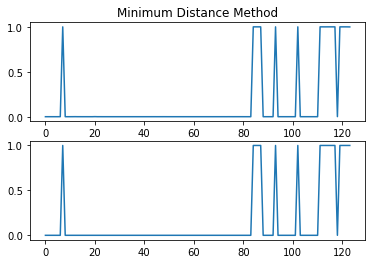

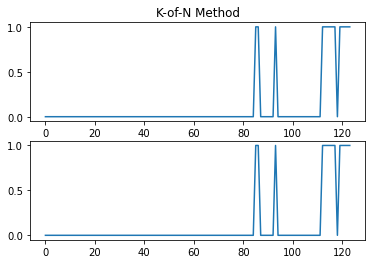

In [711]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [712]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
110 num_zeros_post 14 num_one_post    SUM: 124
14 num_one_post
1 11 12 num_main_one
109 3 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
105 num_zeros_post 19 num_one_post    SUM: 124
1 11 12 num_main_one
104 8 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
110 num_zeros_post 14 num_one_post    SUM: 124
1 11 12 num_main_one
109 3 112 num_main_zeros
124 all


In [713]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=50, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_s, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/30 [========================>.....] - ETA: 0s - loss: 0.6334 - accuracy: 0.6275
Epoch 1: accuracy improved from -inf to 0.65104, saving model to best_model.h5
30/30 [==============================] - 3s 12ms/step - loss: 0.6134 - accuracy: 0.6510
Epoch 2/500
26/30 [=========================>....] - ETA: 0s - loss: 0.4745 - accuracy: 0.7668
Epoch 2: accuracy improved from 0.65104 to 0.77604, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.4626 - accuracy: 0.7760
Epoch 3/500
29/30 [============================>.] - ETA: 0s - loss: 0.4154 - accuracy: 0.8017
Epoch 3: accuracy improved from 0.77604 to 0.79896, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.4161 - accuracy: 0.7990
Epoch 4/500
28/30 [===========================>..] - ETA: 0s - loss: 0.3833 - accuracy: 0.8092
Epoch 4: accuracy improved from 0.79896 to 0.80833, saving model to best_model.h5
30/30 [==============================] - 0s 9

23/30 [======================>.......] - ETA: 0s - loss: 0.0863 - accuracy: 0.9647
Epoch 34: accuracy did not improve from 0.97188
30/30 [==============================] - 0s 7ms/step - loss: 0.0805 - accuracy: 0.9688
Epoch 35/500
30/30 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9792
Epoch 35: accuracy improved from 0.97188 to 0.97917, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.0683 - accuracy: 0.9792
Epoch 36/500
29/30 [============================>.] - ETA: 0s - loss: 0.0690 - accuracy: 0.9720
Epoch 36: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 8ms/step - loss: 0.0716 - accuracy: 0.9708
Epoch 37/500
29/30 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9784
Epoch 37: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 8ms/step - loss: 0.0653 - accuracy: 0.9781
Epoch 38/500
23/30 [======================>.......] - 

28/30 [===========================>..] - ETA: 0s - loss: 0.0406 - accuracy: 0.9844
Epoch 69: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9854
Epoch 70/500
29/30 [============================>.] - ETA: 0s - loss: 0.0516 - accuracy: 0.9763
Epoch 70: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9760
Epoch 71/500
30/30 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9760
Epoch 71: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 8ms/step - loss: 0.0504 - accuracy: 0.9760
Epoch 72/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0460 - accuracy: 0.9844
Epoch 72: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9844
Epoch 73/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0536 - accuracy: 

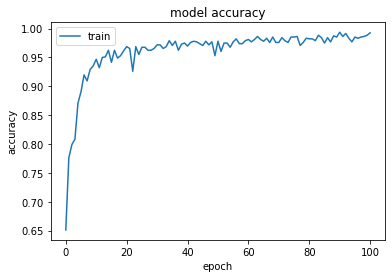

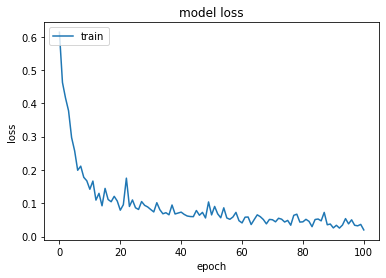

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_144 (LSTM)             (None, 6, 64)             29952     
                                                                 
 lstm_145 (LSTM)             (None, 64)                33024     
                                                                 
 dense_144 (Dense)           (None, 100)               6500      
                                                                 
 dense_145 (Dense)           (None, 1)                 101       
                                                                 
Total params: 69,577
Trainable params: 69,577
Non-trainable params: 0
_________________________________________________________________


In [714]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=64, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 64, return_sequences=False, dropout = 0.3)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.75    FPR_ave: 0.017857142857142905    Accuracy_ave: 0.9596774193548387    AUC_ave: 0.9828869047619048

 Results for mean method:   Sen_md 0.8333333333333334    FPR_md: 0.017857142857142905    Accuracy_md: 0.967741935483871    AUC_md: 0.988095238095238

 Results for k-of-N:   Sen_kn 0.5833333333333334    FPR_kn: 0.017857142857142905    Accuracy_kn: 0.9435483870967742    AUC_kn: 0.7827380952380953


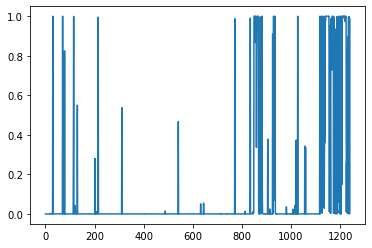

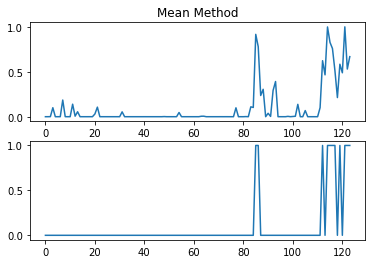

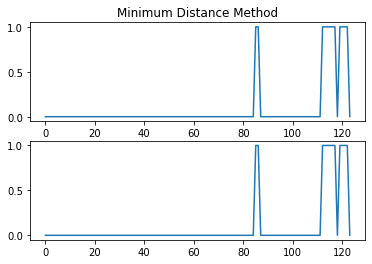

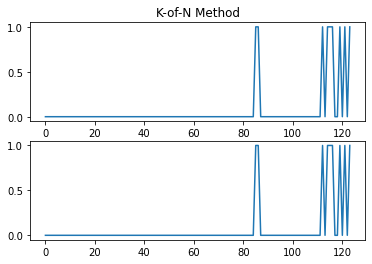

In [715]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

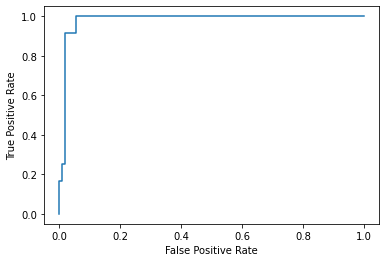

In [716]:
##### Example of plotting the ROC CUREVE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ =  metrics.roc_curve( y_test_mean_ave,y_hat_ave)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [717]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
113 num_zeros_post 11 num_one_post    SUM: 124
11 num_one_post
3 9 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
2 10 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
115 num_zeros_post 9 num_one_post    SUM: 124
5 7 12 num_main_one
110 2 112 num_main_zeros
124 all


In [718]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=350, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience= patient_l, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/30 [========================>.....] - ETA: 0s - loss: 0.6187 - accuracy: 0.6712
Epoch 1: accuracy improved from -inf to 0.69063, saving model to best_model.h5
30/30 [==============================] - 3s 11ms/step - loss: 0.5897 - accuracy: 0.6906
Epoch 2/500
25/30 [========================>.....] - ETA: 0s - loss: 0.4665 - accuracy: 0.7738
Epoch 2: accuracy improved from 0.69063 to 0.77396, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4630 - accuracy: 0.7740
Epoch 3/500
30/30 [==============================] - ETA: 0s - loss: 0.4043 - accuracy: 0.7979
Epoch 3: accuracy improved from 0.77396 to 0.79792, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.4043 - accuracy: 0.7979
Epoch 4/500
28/30 [===========================>..] - ETA: 0s - loss: 0.3938 - accuracy: 0.8013
Epoch 4: accuracy improved from 0.79792 to 0.80104, saving model to best_model.h5
30/30 [==============================] - 0s 9

Epoch 34/500
29/30 [============================>.] - ETA: 0s - loss: 0.0995 - accuracy: 0.9634
Epoch 34: accuracy did not improve from 0.97604
30/30 [==============================] - 0s 8ms/step - loss: 0.0972 - accuracy: 0.9646
Epoch 35/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0759 - accuracy: 0.9737
Epoch 35: accuracy did not improve from 0.97604
30/30 [==============================] - 0s 7ms/step - loss: 0.0775 - accuracy: 0.9729
Epoch 36/500
29/30 [============================>.] - ETA: 0s - loss: 0.0704 - accuracy: 0.9763
Epoch 36: accuracy did not improve from 0.97604
30/30 [==============================] - 0s 7ms/step - loss: 0.0726 - accuracy: 0.9750
Epoch 37/500
29/30 [============================>.] - ETA: 0s - loss: 0.0734 - accuracy: 0.9720
Epoch 37: accuracy did not improve from 0.97604
30/30 [==============================] - 0s 8ms/step - loss: 0.0745 - accuracy: 0.9719
Epoch 38/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0711

Epoch 69/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0562 - accuracy: 0.9780
Epoch 69: accuracy did not improve from 0.98750
30/30 [==============================] - 0s 8ms/step - loss: 0.0558 - accuracy: 0.9760
Epoch 70/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0358 - accuracy: 0.9877
Epoch 70: accuracy did not improve from 0.98750
30/30 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9875
Epoch 71/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0663 - accuracy: 0.9788
Epoch 71: accuracy did not improve from 0.98750
30/30 [==============================] - 0s 8ms/step - loss: 0.0693 - accuracy: 0.9781
Epoch 72/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0654 - accuracy: 0.9740
Epoch 72: accuracy did not improve from 0.98750
30/30 [==============================] - 0s 7ms/step - loss: 0.0654 - accuracy: 0.9750
Epoch 73/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0530

23/30 [======================>.......] - ETA: 0s - loss: 0.0249 - accuracy: 0.9864
Epoch 104: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9865
Epoch 105/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0482 - accuracy: 0.9808
Epoch 105: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 6ms/step - loss: 0.0528 - accuracy: 0.9781
Epoch 106/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0674 - accuracy: 0.9772
Epoch 106: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 0.9792
Epoch 107/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0427 - accuracy: 0.9825
Epoch 107: accuracy did not improve from 0.98958
30/30 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9823
Epoch 108/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0209 - ac

Epoch 139/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0201 - accuracy: 0.9922
Epoch 139: accuracy did not improve from 0.99479
30/30 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9937
Epoch 140/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0272 - accuracy: 0.9896
Epoch 140: accuracy did not improve from 0.99479
30/30 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.9906
Epoch 141/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0477 - accuracy: 0.9818
Epoch 141: accuracy did not improve from 0.99479
30/30 [==============================] - 0s 7ms/step - loss: 0.0484 - accuracy: 0.9812
Epoch 142/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0223 - accuracy: 0.9916
Epoch 142: accuracy did not improve from 0.99479
30/30 [==============================] - 0s 7ms/step - loss: 0.0229 - accuracy: 0.9906
Epoch 143/500
30/30 [==============================] - ETA: 0s - los

24/30 [=======================>......] - ETA: 0s - loss: 0.0253 - accuracy: 0.9896
Epoch 174: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0303 - accuracy: 0.9875
Epoch 175/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0205 - accuracy: 0.9964
Epoch 175: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0284 - accuracy: 0.9937
Epoch 176/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0322 - accuracy: 0.9883
Epoch 176: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0367 - accuracy: 0.9865
Epoch 177/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0253 - accuracy: 0.9900
Epoch 177: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9917
Epoch 178/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0244 - ac

25/30 [========================>.....] - ETA: 0s - loss: 0.0115 - accuracy: 0.9950
Epoch 209: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9958
Epoch 210/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0371 - accuracy: 0.9875
Epoch 210: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0341 - accuracy: 0.9885
Epoch 211/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0189 - accuracy: 0.9905
Epoch 211: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.9917
Epoch 212/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0377 - accuracy: 0.9838
Epoch 212: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 6ms/step - loss: 0.0359 - accuracy: 0.9844
Epoch 213/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0220 - ac

25/30 [========================>.....] - ETA: 0s - loss: 0.0107 - accuracy: 0.9962
Epoch 244: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.9948
Epoch 245/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0166 - accuracy: 0.9962
Epoch 245: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.9958
Epoch 246/500
30/30 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 0.9958
Epoch 246: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 247/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0225 - accuracy: 0.9950
Epoch 247: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 7ms/step - loss: 0.0216 - accuracy: 0.9937
Epoch 248/500
23/30 [======================>.......] - ETA: 0s - loss: 0.0272 - ac

23/30 [======================>.......] - ETA: 0s - loss: 0.0094 - accuracy: 0.9973
Epoch 279: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9979
Epoch 280/500
30/30 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 0.9958
Epoch 280: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9958
Epoch 281/500
30/30 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9990
Epoch 281: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9990
Epoch 282/500
29/30 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9925
Epoch 282: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.9927
Epoch 283/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0110 - ac

24/30 [=======================>......] - ETA: 0s - loss: 0.0055 - accuracy: 0.9987
Epoch 314: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.9969
Epoch 315/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0184 - accuracy: 0.9962
Epoch 315: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0246 - accuracy: 0.9937
Epoch 316/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0552 - accuracy: 0.9832
Epoch 316: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 317/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0206 - accuracy: 0.9950
Epoch 317: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0256 - accuracy: 0.9937
Epoch 318/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0086 - ac

30/30 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9885
Epoch 349: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9885
Epoch 350/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0306 - accuracy: 0.9857
Epoch 350: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0260 - accuracy: 0.9885
Epoch 351/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0460 - accuracy: 0.9850
Epoch 351: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9854
Epoch 351: early stopping


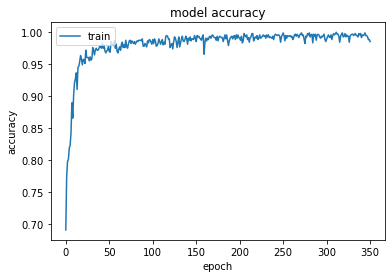

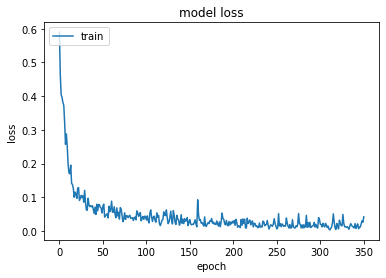

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_146 (LSTM)             (None, 6, 64)             29952     
                                                                 
 lstm_147 (LSTM)             (None, 64)                33024     
                                                                 
 dense_146 (Dense)           (None, 100)               6500      
                                                                 
 dense_147 (Dense)           (None, 1)                 101       
                                                                 
Total params: 69,577
Trainable params: 69,577
Non-trainable params: 0
_________________________________________________________________


In [719]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=64, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 64, return_sequences=False, dropout = 0.3)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.8333333333333334    FPR_ave: 0.017857142857142905    Accuracy_ave: 0.967741935483871    AUC_ave: 0.9903273809523809

 Results for mean method:   Sen_md 0.75    FPR_md: 0.017857142857142905    Accuracy_md: 0.9596774193548387    AUC_md: 0.988095238095238

 Results for k-of-N:   Sen_kn 0.6666666666666666    FPR_kn: 0.008928571428571397    Accuracy_kn: 0.9596774193548387    AUC_kn: 0.8288690476190476


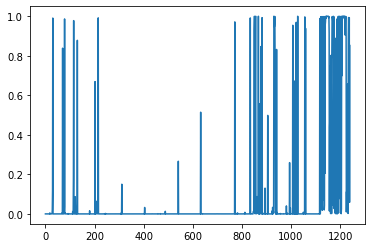

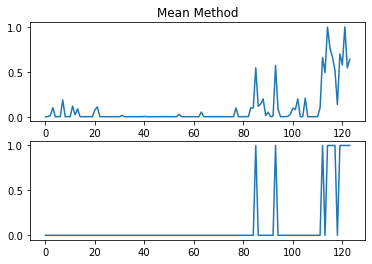

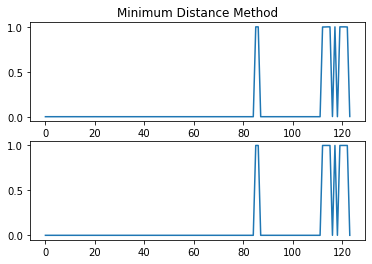

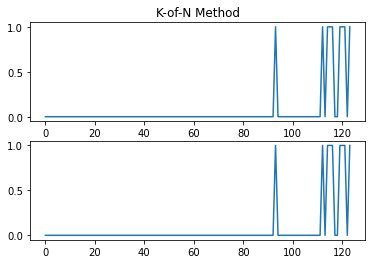

In [720]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [721]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
12 num_one_post
2 10 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
113 num_zeros_post 11 num_one_post    SUM: 124
3 9 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
115 num_zeros_post 9 num_one_post    SUM: 124
4 8 12 num_main_one
111 1 112 num_main_zeros
124 all


In [722]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=50, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_s, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/150


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/30 [========================>.....] - ETA: 0s - loss: 0.5620 - accuracy: 0.7150
Epoch 1: accuracy improved from -inf to 0.73333, saving model to best_model.h5
30/30 [==============================] - 2s 12ms/step - loss: 0.5407 - accuracy: 0.7333
Epoch 2/150
25/30 [========================>.....] - ETA: 0s - loss: 0.4435 - accuracy: 0.7725
Epoch 2: accuracy improved from 0.73333 to 0.77708, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4471 - accuracy: 0.7771
Epoch 3/150
29/30 [============================>.] - ETA: 0s - loss: 0.3941 - accuracy: 0.8179
Epoch 3: accuracy improved from 0.77708 to 0.81458, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.4058 - accuracy: 0.8146
Epoch 4/150
24/30 [=======================>......] - ETA: 0s - loss: 0.5294 - accuracy: 0.7201
Epoch 4: accuracy did not improve from 0.81458
30/30 [==============================] - 0s 7ms/step - loss: 0.5055 - accuracy: 

23/30 [======================>.......] - ETA: 0s - loss: 0.1156 - accuracy: 0.9538
Epoch 34: accuracy did not improve from 0.97500
30/30 [==============================] - 0s 7ms/step - loss: 0.1040 - accuracy: 0.9583
Epoch 35/150
26/30 [=========================>....] - ETA: 0s - loss: 0.0719 - accuracy: 0.9748
Epoch 35: accuracy did not improve from 0.97500
30/30 [==============================] - 0s 7ms/step - loss: 0.0774 - accuracy: 0.9750
Epoch 36/150
25/30 [========================>.....] - ETA: 0s - loss: 0.0828 - accuracy: 0.9675
Epoch 36: accuracy did not improve from 0.97500
30/30 [==============================] - 0s 7ms/step - loss: 0.0840 - accuracy: 0.9667
Epoch 37/150
25/30 [========================>.....] - ETA: 0s - loss: 0.1083 - accuracy: 0.9575
Epoch 37: accuracy did not improve from 0.97500
30/30 [==============================] - 0s 7ms/step - loss: 0.1071 - accuracy: 0.9573
Epoch 38/150
24/30 [=======================>......] - ETA: 0s - loss: 0.0924 - accuracy: 

30/30 [==============================] - ETA: 0s - loss: 0.0635 - accuracy: 0.9771
Epoch 69: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 8ms/step - loss: 0.0635 - accuracy: 0.9771
Epoch 70/150
30/30 [==============================] - ETA: 0s - loss: 0.0564 - accuracy: 0.9781
Epoch 70: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 8ms/step - loss: 0.0564 - accuracy: 0.9781
Epoch 71/150
25/30 [========================>.....] - ETA: 0s - loss: 0.0414 - accuracy: 0.9862
Epoch 71: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 7ms/step - loss: 0.0465 - accuracy: 0.9833
Epoch 72/150
25/30 [========================>.....] - ETA: 0s - loss: 0.0338 - accuracy: 0.9900
Epoch 72: accuracy improved from 0.98542 to 0.98958, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9896
Epoch 73/150
24/30 [=======================>......] - 

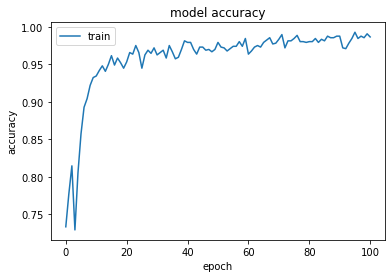

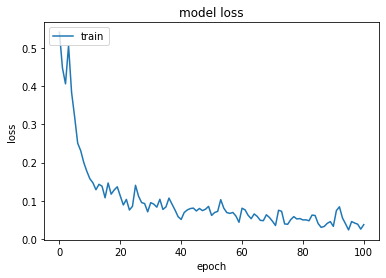

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_148 (LSTM)             (None, 6, 128)            92672     
                                                                 
 lstm_149 (LSTM)             (None, 128)               131584    
                                                                 
 dense_148 (Dense)           (None, 100)               12900     
                                                                 
 dense_149 (Dense)           (None, 1)                 101       
                                                                 
Total params: 237,257
Trainable params: 237,257
Non-trainable params: 0
_________________________________________________________________


In [723]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=128, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 128, return_sequences=False, dropout = 0.5)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_s, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.8333333333333334    FPR_ave: 0.017857142857142905    Accuracy_ave: 0.967741935483871    AUC_ave: 0.9836309523809523

 Results for mean method:   Sen_md 0.8333333333333334    FPR_md: 0.0357142857142857    Accuracy_md: 0.9516129032258065    AUC_md: 0.9661458333333334

 Results for k-of-N:   Sen_kn 0.6666666666666666    FPR_kn: 0.017857142857142905    Accuracy_kn: 0.9516129032258065    AUC_kn: 0.8244047619047618


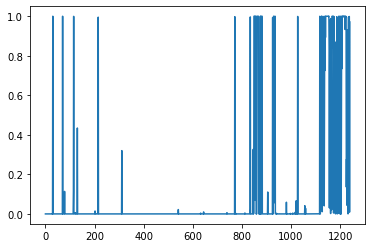

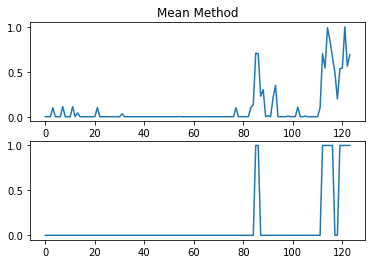

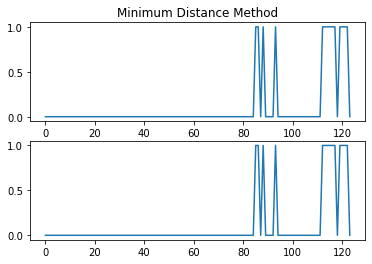

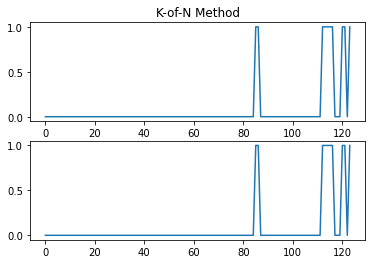

In [724]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [725]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
112 num_zeros_post 12 num_one_post    SUM: 124
12 num_one_post
2 10 12 num_main_one
110 2 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
110 num_zeros_post 14 num_one_post    SUM: 124
2 10 12 num_main_one
108 4 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
114 num_zeros_post 10 num_one_post    SUM: 124
4 8 12 num_main_one
110 2 112 num_main_zeros
124 all


In [726]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=350, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_l, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


24/30 [=======================>......] - ETA: 0s - loss: 0.6238 - accuracy: 0.6484
Epoch 1: accuracy improved from -inf to 0.64062, saving model to best_model.h5
30/30 [==============================] - 3s 13ms/step - loss: 0.6180 - accuracy: 0.6406
Epoch 2/500
29/30 [============================>.] - ETA: 0s - loss: 0.5058 - accuracy: 0.7522
Epoch 2: accuracy improved from 0.64062 to 0.75521, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.5033 - accuracy: 0.7552
Epoch 3/500
30/30 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.7750
Epoch 3: accuracy improved from 0.75521 to 0.77500, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.4472 - accuracy: 0.7750
Epoch 4/500
29/30 [============================>.] - ETA: 0s - loss: 0.4109 - accuracy: 0.7780
Epoch 4: accuracy improved from 0.77500 to 0.78229, saving model to best_model.h5
30/30 [==============================] - 0s 9

30/30 [==============================] - 0s 8ms/step - loss: 0.0697 - accuracy: 0.9708
Epoch 35/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0879 - accuracy: 0.9632
Epoch 35: accuracy did not improve from 0.97292
30/30 [==============================] - 0s 8ms/step - loss: 0.0872 - accuracy: 0.9635
Epoch 36/500
29/30 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9634
Epoch 36: accuracy did not improve from 0.97292
30/30 [==============================] - 0s 8ms/step - loss: 0.0849 - accuracy: 0.9635
Epoch 37/500
30/30 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9740
Epoch 37: accuracy improved from 0.97292 to 0.97396, saving model to best_model.h5
30/30 [==============================] - 0s 9ms/step - loss: 0.0673 - accuracy: 0.9740
Epoch 38/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0842 - accuracy: 0.9665
Epoch 38: accuracy did not improve from 0.97396
30/30 [==============================] - 

27/30 [==========================>...] - ETA: 0s - loss: 0.0494 - accuracy: 0.9792
Epoch 69: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 9ms/step - loss: 0.0468 - accuracy: 0.9792
Epoch 70/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0604 - accuracy: 0.9799
Epoch 70: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 8ms/step - loss: 0.0613 - accuracy: 0.9792
Epoch 71/500
29/30 [============================>.] - ETA: 0s - loss: 0.0526 - accuracy: 0.9817
Epoch 71: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 9ms/step - loss: 0.0514 - accuracy: 0.9823
Epoch 72/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0488 - accuracy: 0.9825
Epoch 72: accuracy did not improve from 0.98646
30/30 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9844
Epoch 73/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0573 - accuracy: 

29/30 [============================>.] - ETA: 0s - loss: 0.0298 - accuracy: 0.9925
Epoch 104: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 10ms/step - loss: 0.0331 - accuracy: 0.9906
Epoch 105/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0360 - accuracy: 0.9837
Epoch 105: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9844
Epoch 106/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0357 - accuracy: 0.9862
Epoch 106: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 0.9865
Epoch 107/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0297 - accuracy: 0.9904
Epoch 107: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 9ms/step - loss: 0.0286 - accuracy: 0.9906
Epoch 108/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0243 - a

Epoch 139/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0357 - accuracy: 0.9873
Epoch 139: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 11ms/step - loss: 0.0343 - accuracy: 0.9875
Epoch 140/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0435 - accuracy: 0.9875
Epoch 140: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 9ms/step - loss: 0.0418 - accuracy: 0.9875
Epoch 141/500
30/30 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9771
Epoch 141: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 9ms/step - loss: 0.0683 - accuracy: 0.9771
Epoch 142/500
30/30 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9854
Epoch 142: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 10ms/step - loss: 0.0357 - accuracy: 0.9854
Epoch 143/500
28/30 [===========================>..] - ETA: 0s - l

Epoch 174/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0372 - accuracy: 0.9912
Epoch 174: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 0.9885
Epoch 175/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0690 - accuracy: 0.9737
Epoch 175: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 9ms/step - loss: 0.0738 - accuracy: 0.9708
Epoch 176/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0432 - accuracy: 0.9825
Epoch 176: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9833
Epoch 177/500
30/30 [==============================] - ETA: 0s - loss: 0.0215 - accuracy: 0.9937
Epoch 177: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 9ms/step - loss: 0.0215 - accuracy: 0.9937
Epoch 178/500
26/30 [=========================>....] - ETA: 0s - los

Epoch 209/500
29/30 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9881
Epoch 209: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9875
Epoch 210/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9904
Epoch 210: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.9917
Epoch 211/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0252 - accuracy: 0.9912
Epoch 211: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9906
Epoch 212/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0158 - accuracy: 0.9916
Epoch 212: accuracy did not improve from 0.99896
30/30 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.9927
Epoch 213/500
27/30 [==========================>...] - ETA: 0s - lo

Epoch 244/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978
Epoch 244: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 245/500
29/30 [============================>.] - ETA: 0s - loss: 0.0194 - accuracy: 0.9935
Epoch 245: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0188 - accuracy: 0.9937
Epoch 246/500
29/30 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9957
Epoch 246: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.9958
Epoch 247/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9931
Epoch 247: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0175 - accuracy: 0.9927
Epoch 248/500
30/30 [==============================] - ETA: 0s - los

28/30 [===========================>..] - ETA: 0s - loss: 0.0142 - accuracy: 0.9967
Epoch 279: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9969
Epoch 280/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0256 - accuracy: 0.9919
Epoch 280: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0300 - accuracy: 0.9896
Epoch 281/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0177 - accuracy: 0.9942
Epoch 281: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 282/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0079 - accuracy: 0.9978
Epoch 282: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 283/500
29/30 [============================>.] - ETA: 0s - loss: 0.0189 - ac

26/30 [=========================>....] - ETA: 0s - loss: 0.0152 - accuracy: 0.9940
Epoch 314: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0138 - accuracy: 0.9948
Epoch 315/500
30/30 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9906
Epoch 315: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.9906
Epoch 316/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0109 - accuracy: 0.9942
Epoch 316: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.9948
Epoch 317/500
30/30 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9917
Epoch 317: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0332 - accuracy: 0.9917
Epoch 318/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0230 - ac

27/30 [==========================>...] - ETA: 0s - loss: 0.0178 - accuracy: 0.9942
Epoch 349: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 350/500
25/30 [========================>.....] - ETA: 0s - loss: 0.0173 - accuracy: 0.9937
Epoch 350: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.9927
Epoch 351/500
30/30 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9937
Epoch 351: accuracy did not improve from 1.00000
30/30 [==============================] - 0s 9ms/step - loss: 0.0219 - accuracy: 0.9937
Epoch 351: early stopping


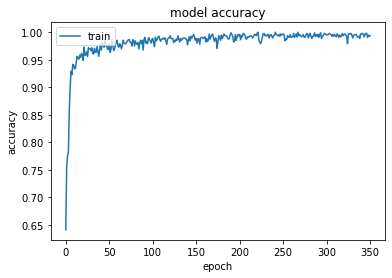

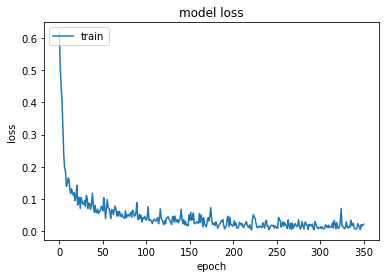

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_150 (LSTM)             (None, 6, 128)            92672     
                                                                 
 lstm_151 (LSTM)             (None, 128)               131584    
                                                                 
 dense_150 (Dense)           (None, 100)               12900     
                                                                 
 dense_151 (Dense)           (None, 1)                 101       
                                                                 
Total params: 237,257
Trainable params: 237,257
Non-trainable params: 0
_________________________________________________________________


In [727]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=128, return_sequences = True, dropout = 0.1,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 128, return_sequences=False, dropout = 0.5)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.9166666666666666    FPR_ave: 0.0267857142857143    Accuracy_ave: 0.967741935483871    AUC_ave: 0.9955357142857143

 Results for mean method:   Sen_md 1.0    FPR_md: 0.0892857142857143    Accuracy_md: 0.9193548387096774    AUC_md: 0.9356398809523809

 Results for k-of-N:   Sen_kn 0.9166666666666666    FPR_kn: 0.017857142857142905    Accuracy_kn: 0.9758064516129032    AUC_kn: 0.9494047619047619


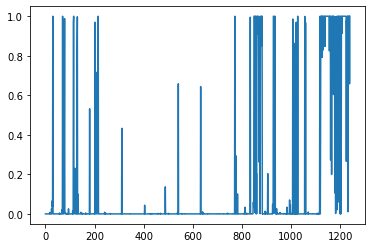

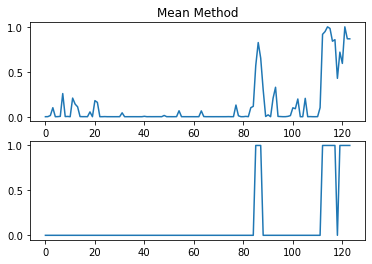

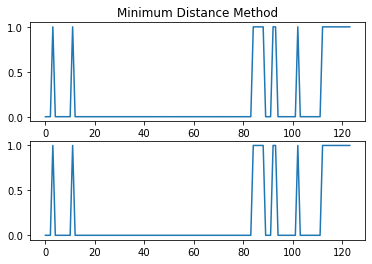

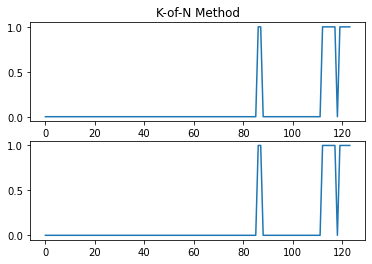

In [728]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [729]:
print("////////  average method ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_ave), "out_post")
print(k_zero_ave, "num_zeros_post",   k_one_ave, "num_one_post",  "   SUM:", k_zero_ave + k_one_ave )
print(k_one_ave, "num_one_post")
print(FN_ave , TP_ave, FN_ave + TP_ave, "num_main_one")
print(TN_ave , FP_ave, TN_ave + FP_ave, "num_main_zeros")
print(FP_ave + FN_ave + TP_ave + TN_ave, "all")
print("////////  md ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_md), "out_post")
print(k_zero_md, "num_zeros_post",   k_one_md, "num_one_post",  "   SUM:", k_zero_md + k_one_md )
print(FN_md , TP_md, FN_md + TP_md, "num_main_one")
print(TN_md , FP_md, TN_md + FP_md, "num_main_zeros")
print(FP_md + FN_md + TP_md + TN_md, "all")
print("////////  kn ////////")
print(np.shape(y_hat_first), "out_size")
print(np.shape(y_test_mean_kn), "out_post")
print(k_zero_kn, "num_zeros_post",   k_one_kn, "num_one_post",  "   SUM:", k_zero_kn + k_one_kn )
print(FN_kn , TP_kn, FN_kn + TP_kn, "num_main_one")
print(TN_kn , FP_kn, TN_kn + FP_kn, "num_main_zeros")
print(FP_kn + FN_kn + TP_kn + TN_kn, "all")

////////  average method ////////
(1240, 1) out_size
(124,) out_post
110 num_zeros_post 14 num_one_post    SUM: 124
14 num_one_post
1 11 12 num_main_one
109 3 112 num_main_zeros
124 all
////////  md ////////
(1240, 1) out_size
(124,) out_post
102 num_zeros_post 22 num_one_post    SUM: 124
0 12 12 num_main_one
102 10 112 num_main_zeros
124 all
////////  kn ////////
(1240, 1) out_size
(124,) out_post
111 num_zeros_post 13 num_one_post    SUM: 124
1 11 12 num_main_one
110 2 112 num_main_zeros
124 all


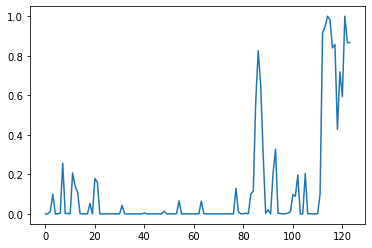

In [730]:
plt.plot(y_hat_ave)

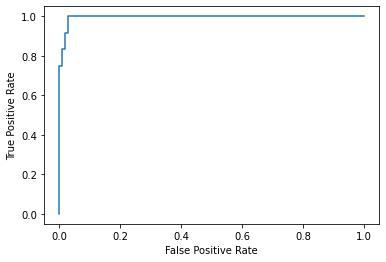

In [731]:
##### Example of plotting the ROC CUREVE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ =  metrics.roc_curve( y_test_mean_ave,y_hat_ave)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [732]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=350, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_s, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/150


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/30 [==========================>...] - ETA: 0s - loss: 0.6079 - accuracy: 0.6528
Epoch 1: accuracy improved from -inf to 0.66771, saving model to best_model.h5
30/30 [==============================] - 3s 15ms/step - loss: 0.5923 - accuracy: 0.6677
Epoch 2/150
27/30 [==========================>...] - ETA: 0s - loss: 0.5145 - accuracy: 0.7465
Epoch 2: accuracy improved from 0.66771 to 0.74375, saving model to best_model.h5
30/30 [==============================] - 0s 10ms/step - loss: 0.5127 - accuracy: 0.7437
Epoch 3/150
27/30 [==========================>...] - ETA: 0s - loss: 0.4434 - accuracy: 0.7859
Epoch 3: accuracy improved from 0.74375 to 0.78229, saving model to best_model.h5
30/30 [==============================] - 0s 10ms/step - loss: 0.4454 - accuracy: 0.7823
Epoch 4/150
28/30 [===========================>..] - ETA: 0s - loss: 0.4290 - accuracy: 0.7801
Epoch 4: accuracy did not improve from 0.78229
30/30 [==============================] - 0s 8ms/step - loss: 0.4282 - accuracy

30/30 [==============================] - ETA: 0s - loss: 0.1179 - accuracy: 0.9490
Epoch 34: accuracy did not improve from 0.96562
30/30 [==============================] - 0s 9ms/step - loss: 0.1179 - accuracy: 0.9490
Epoch 35/150
25/30 [========================>.....] - ETA: 0s - loss: 0.1353 - accuracy: 0.9488
Epoch 35: accuracy did not improve from 0.96562
30/30 [==============================] - 0s 9ms/step - loss: 0.1268 - accuracy: 0.9521
Epoch 36/150
26/30 [=========================>....] - ETA: 0s - loss: 0.1164 - accuracy: 0.9507
Epoch 36: accuracy did not improve from 0.96562
30/30 [==============================] - 0s 9ms/step - loss: 0.1125 - accuracy: 0.9552
Epoch 37/150
30/30 [==============================] - ETA: 0s - loss: 0.1108 - accuracy: 0.9552
Epoch 37: accuracy did not improve from 0.96562
30/30 [==============================] - 0s 9ms/step - loss: 0.1108 - accuracy: 0.9552
Epoch 38/150
25/30 [========================>.....] - ETA: 0s - loss: 0.1201 - accuracy: 

25/30 [========================>.....] - ETA: 0s - loss: 0.0931 - accuracy: 0.9600
Epoch 69: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 9ms/step - loss: 0.0921 - accuracy: 0.9604
Epoch 70/150
26/30 [=========================>....] - ETA: 0s - loss: 0.0845 - accuracy: 0.9700
Epoch 70: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 9ms/step - loss: 0.0791 - accuracy: 0.9708
Epoch 71/150
28/30 [===========================>..] - ETA: 0s - loss: 0.0923 - accuracy: 0.9732
Epoch 71: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 10ms/step - loss: 0.0910 - accuracy: 0.9719
Epoch 72/150
28/30 [===========================>..] - ETA: 0s - loss: 0.0844 - accuracy: 0.9632
Epoch 72: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 11ms/step - loss: 0.0858 - accuracy: 0.9615
Epoch 73/150
29/30 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy

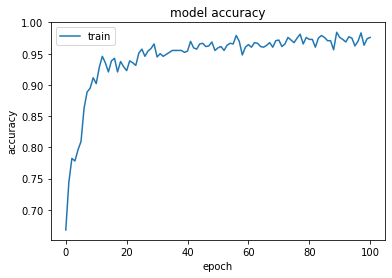

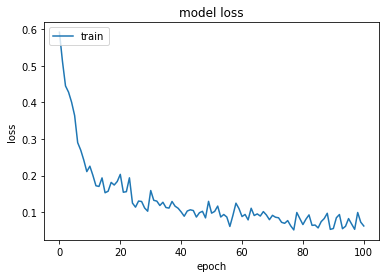

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_152 (LSTM)             (None, 6, 256)            316416    
                                                                 
 lstm_153 (LSTM)             (None, 256)               525312    
                                                                 
 dense_152 (Dense)           (None, 100)               25700     
                                                                 
 dense_153 (Dense)           (None, 1)                 101       
                                                                 
Total params: 867,529
Trainable params: 867,529
Non-trainable params: 0
_________________________________________________________________


In [733]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=256, return_sequences = True, dropout = 0.2,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 256, return_sequences=False, dropout = 0.5)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_s, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 0.9166666666666666    FPR_ave: 0.008928571428571397    Accuracy_ave: 0.9838709677419355    AUC_ave: 0.9955357142857143

 Results for mean method:   Sen_md 1.0    FPR_md: 0.0267857142857143    Accuracy_md: 0.9758064516129032    AUC_md: 0.9732142857142857

 Results for k-of-N:   Sen_kn 0.9166666666666666    FPR_kn: 0.008928571428571397    Accuracy_kn: 0.9838709677419355    AUC_kn: 0.9538690476190476


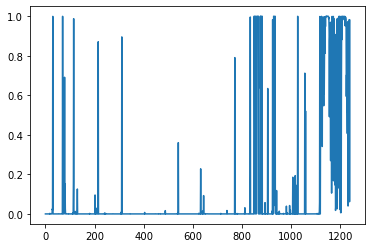

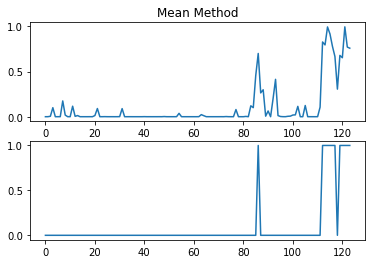

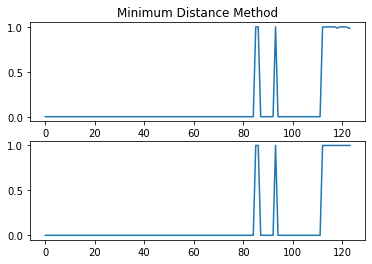

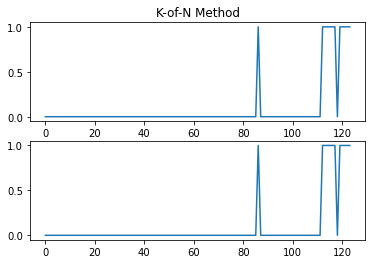

In [734]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)

In [735]:
#ACCURACY_THRESHOLD = 0.96
#LOSS_THRESHOLD = 0.05
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95
#class myCallback(tf.keras.callbacks.Callback):
#    def on_epoch_end(self, epoch, logs={}):
#        if((logs.get('val_accuracy') > ACCURACY_THRESHOLD) and (logs.get('val_loss') < LOSS_THRESHOLD)):
#            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
#            self.model.stop_training = True
            
#callbacks = myCallback()

##### Simple Early stop
####I use this site: https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# simple early stopping
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
####
#es = EarlyStopping(monitor='loss', mode='min', patience=350, verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)
es = EarlyStopping(monitor='loss', min_delta = 1, mode='auto', patience=patient_l, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='accuracy', min_delta = 1, mode='max', verbose=1, save_best_only=True)


Epoch 1/500


C:\Users\Shiva\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/30 [========================>.....] - ETA: 0s - loss: 0.5925 - accuracy: 0.6787
Epoch 1: accuracy improved from -inf to 0.68958, saving model to best_model.h5
30/30 [==============================] - 2s 12ms/step - loss: 0.5719 - accuracy: 0.6896
Epoch 2/500
26/30 [=========================>....] - ETA: 0s - loss: 0.4567 - accuracy: 0.7776
Epoch 2: accuracy improved from 0.68958 to 0.76771, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4636 - accuracy: 0.7677
Epoch 3/500
25/30 [========================>.....] - ETA: 0s - loss: 0.4514 - accuracy: 0.7700
Epoch 3: accuracy improved from 0.76771 to 0.77500, saving model to best_model.h5
30/30 [==============================] - 0s 8ms/step - loss: 0.4388 - accuracy: 0.7750
Epoch 4/500
24/30 [=======================>......] - ETA: 0s - loss: 0.3883 - accuracy: 0.8099
Epoch 4: accuracy improved from 0.77500 to 0.80313, saving model to best_model.h5
30/30 [==============================] - 0s 8

30/30 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9396
Epoch 34: accuracy did not improve from 0.96354
30/30 [==============================] - 0s 9ms/step - loss: 0.1475 - accuracy: 0.9396
Epoch 35/500
29/30 [============================>.] - ETA: 0s - loss: 0.1210 - accuracy: 0.9537
Epoch 35: accuracy did not improve from 0.96354
30/30 [==============================] - 0s 10ms/step - loss: 0.1193 - accuracy: 0.9542
Epoch 36/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0972 - accuracy: 0.9688
Epoch 36: accuracy improved from 0.96354 to 0.96458, saving model to best_model.h5
30/30 [==============================] - 0s 13ms/step - loss: 0.0987 - accuracy: 0.9646
Epoch 37/500
29/30 [============================>.] - ETA: 0s - loss: 0.0898 - accuracy: 0.9688
Epoch 37: accuracy improved from 0.96458 to 0.96875, saving model to best_model.h5
30/30 [==============================] - 0s 12ms/step - loss: 0.0893 - accuracy: 0.9688
Epoch 38/500
27/

30/30 [==============================] - 0s 13ms/step - loss: 0.1067 - accuracy: 0.9604
Epoch 69/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0663 - accuracy: 0.9757
Epoch 69: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 13ms/step - loss: 0.0651 - accuracy: 0.9771
Epoch 70/500
30/30 [==============================] - ETA: 0s - loss: 0.1059 - accuracy: 0.9656
Epoch 70: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 13ms/step - loss: 0.1059 - accuracy: 0.9656
Epoch 71/500
30/30 [==============================] - ETA: 0s - loss: 0.0783 - accuracy: 0.9729
Epoch 71: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 13ms/step - loss: 0.0783 - accuracy: 0.9729
Epoch 72/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0588 - accuracy: 0.9769
Epoch 72: accuracy did not improve from 0.97917
30/30 [==============================] - 0s 13ms/step - loss: 0.0601 - a

Epoch 104/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0960 - accuracy: 0.9711
Epoch 104: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 13ms/step - loss: 0.0924 - accuracy: 0.9708
Epoch 105/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0487 - accuracy: 0.9803
Epoch 105: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 14ms/step - loss: 0.0465 - accuracy: 0.9823
Epoch 106/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0596 - accuracy: 0.9833
Epoch 106: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 13ms/step - loss: 0.0566 - accuracy: 0.9844
Epoch 107/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0509 - accuracy: 0.9734
Epoch 107: accuracy did not improve from 0.98542
30/30 [==============================] - 0s 13ms/step - loss: 0.0530 - accuracy: 0.9729
Epoch 108/500
29/30 [============================>.] - ETA: 0s -

Epoch 139/500
30/30 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9760
Epoch 139: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0743 - accuracy: 0.9760
Epoch 140/500
26/30 [=========================>....] - ETA: 0s - loss: 0.0470 - accuracy: 0.9820
Epoch 140: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0426 - accuracy: 0.9844
Epoch 141/500
30/30 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9698
Epoch 141: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0760 - accuracy: 0.9698
Epoch 142/500
29/30 [============================>.] - ETA: 0s - loss: 0.0661 - accuracy: 0.9784
Epoch 142: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0642 - accuracy: 0.9792
Epoch 143/500
30/30 [==============================] - ETA: 0s -

26/30 [=========================>....] - ETA: 0s - loss: 0.0311 - accuracy: 0.9892
Epoch 174: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.9875
Epoch 175/500
29/30 [============================>.] - ETA: 0s - loss: 0.0440 - accuracy: 0.9828
Epoch 175: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0440 - accuracy: 0.9823
Epoch 176/500
30/30 [==============================] - ETA: 0s - loss: 0.0285 - accuracy: 0.9865
Epoch 176: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0285 - accuracy: 0.9865
Epoch 177/500
30/30 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9844
Epoch 177: accuracy did not improve from 0.99063
30/30 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.9844
Epoch 178/500
29/30 [============================>.] - ETA: 0s - loss: 0.0454 

Epoch 209/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0391 - accuracy: 0.9833
Epoch 209: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.9844
Epoch 210/500
29/30 [============================>.] - ETA: 0s - loss: 0.0345 - accuracy: 0.9860
Epoch 210: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.9865
Epoch 211/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0542 - accuracy: 0.9799
Epoch 211: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.9812
Epoch 212/500
30/30 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9865
Epoch 212: accuracy did not improve from 0.99375
30/30 [==============================] - 0s 12ms/step - loss: 0.0498 - accuracy: 0.9865
Epoch 213/500
29/30 [============================>.] - ETA: 0s -

Epoch 244/500
30/30 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9865
Epoch 244: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9865
Epoch 245/500
29/30 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9871
Epoch 245: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 14ms/step - loss: 0.0297 - accuracy: 0.9875
Epoch 246/500
29/30 [============================>.] - ETA: 0s - loss: 0.0458 - accuracy: 0.9849
Epoch 246: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 13ms/step - loss: 0.0445 - accuracy: 0.9854
Epoch 247/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0451 - accuracy: 0.9826
Epoch 247: accuracy did not improve from 0.99583
30/30 [==============================] - 0s 13ms/step - loss: 0.0467 - accuracy: 0.9812
Epoch 248/500
29/30 [============================>.] - ETA: 0s -

Epoch 279/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0320 - accuracy: 0.9873
Epoch 279: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 11ms/step - loss: 0.0332 - accuracy: 0.9865
Epoch 280/500
30/30 [==============================] - ETA: 0s - loss: 0.0277 - accuracy: 0.9906
Epoch 280: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9906
Epoch 281/500
29/30 [============================>.] - ETA: 0s - loss: 0.0405 - accuracy: 0.9871
Epoch 281: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 10ms/step - loss: 0.0422 - accuracy: 0.9865
Epoch 282/500
30/30 [==============================] - ETA: 0s - loss: 0.0242 - accuracy: 0.9906
Epoch 282: accuracy did not improve from 0.99687
30/30 [==============================] - 0s 12ms/step - loss: 0.0242 - accuracy: 0.9906
Epoch 283/500
29/30 [============================>.] - ETA: 0s -

Epoch 314/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.9919
Epoch 314: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 8ms/step - loss: 0.0296 - accuracy: 0.9885
Epoch 315/500
24/30 [=======================>......] - ETA: 0s - loss: 0.0393 - accuracy: 0.9857
Epoch 315: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 0.9865
Epoch 316/500
30/30 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.9844
Epoch 316: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 10ms/step - loss: 0.0335 - accuracy: 0.9844
Epoch 317/500
28/30 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9933
Epoch 317: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 10ms/step - loss: 0.0184 - accuracy: 0.9937
Epoch 318/500
25/30 [========================>.....] - ETA: 0s - l

25/30 [========================>.....] - ETA: 0s - loss: 0.0145 - accuracy: 0.9950
Epoch 349: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 12ms/step - loss: 0.0127 - accuracy: 0.9958
Epoch 350/500
29/30 [============================>.] - ETA: 0s - loss: 0.0210 - accuracy: 0.9925
Epoch 350: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 12ms/step - loss: 0.0204 - accuracy: 0.9927
Epoch 351/500
27/30 [==========================>...] - ETA: 0s - loss: 0.0188 - accuracy: 0.9919
Epoch 351: accuracy did not improve from 0.99792
30/30 [==============================] - 0s 13ms/step - loss: 0.0184 - accuracy: 0.9917
Epoch 351: early stopping


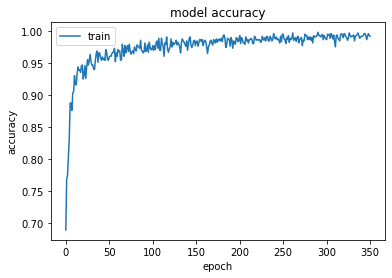

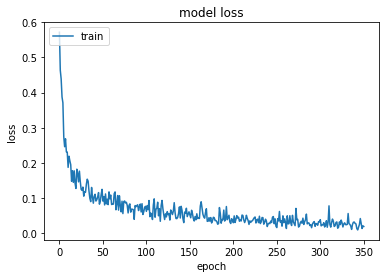

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_154 (LSTM)             (None, 6, 256)            316416    
                                                                 
 lstm_155 (LSTM)             (None, 256)               525312    
                                                                 
 dense_154 (Dense)           (None, 100)               25700     
                                                                 
 dense_155 (Dense)           (None, 1)                 101       
                                                                 
Total params: 867,529
Trainable params: 867,529
Non-trainable params: 0
_________________________________________________________________


In [736]:
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
#### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from tensorflow import keras
from tensorflow.keras.backend import sigmoid
def swish(x, beta = 1):
    return (x * sigmoid(beta * x))
from tensorflow import keras
from keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})
#########

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Bidirectional 
#import keras
from sklearn.model_selection import train_test_split

model0 = Sequential()

model0.add((LSTM(units=256, return_sequences = True, dropout = 0.2,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model0.add(BatchNormalization())
model0.add((LSTM(units= 256, return_sequences=False, dropout = 0.5)))

#model0.add((LSTM(units= 16, return_sequences=False, dropout = 0.5)))
#model0.add(BatchNormalization())
model0.add(Dense(units=100, activation = "swish"))
#model0.add(Dense(units=30, activation = "relu"))
model0.add(Dense(units=1, activation = "sigmoid"))
#########
optimizer = keras.optimizers.Adam(lr=0.001)  ### according to the Ref.1
model0.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

#binary_crossentropy
## selu, elu, exponential, softmax, sigmoid, relu, tanh, 
#optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9)
#model0.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-6)
#model0.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
#model0.compile(optimizer=optimizer, loss='Hinge', metrics=['accuracy'])


###################################################################################
###################################################################################
###################################################################################
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, callbacks=[callbacks])
#history = model0.fit(x_train, y_train, validation_split=0.2, epochs= 500, verbose=1, callbacks=[es])
#history = model0.fit(x_train, y_train, epochs= 500, validation_split=0.1, verbose=1, callbacks=[es, mc])
 

history = model0.fit(x_train, y_train, epochs= epoch_l, callbacks=[es, mc])
#history = model0.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=500, batch_size=200, callbacks=[es, mc])
###, shuffle = True
### if you want to validate the system with the special validation data
##history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=10)
###################################################################################
###################################################################################
###################################################################################
# summarize history for accuracy
import matplotlib.pyplot as plt
##
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#####
model0.summary()

Results for mean method:   Sen_ave 1.0    FPR_ave: 0.0    Accuracy_ave: 1.0    AUC_ave: 1.0

 Results for mean method:   Sen_md 1.0    FPR_md: 0.044642857142857095    Accuracy_md: 0.9596774193548387    AUC_md: 0.9910714285714286

 Results for k-of-N:   Sen_kn 1.0    FPR_kn: 0.0    Accuracy_kn: 1.0    AUC_kn: 1.0


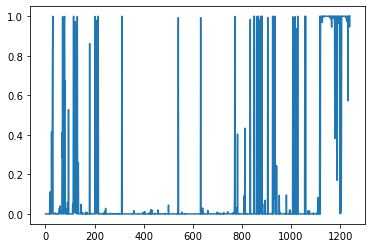

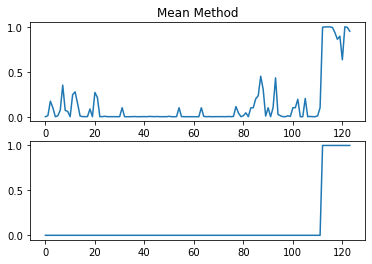

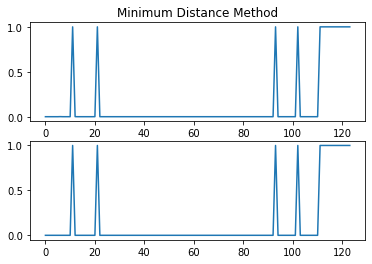

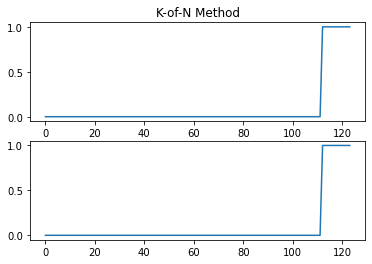

In [737]:
######################################################################################################
#####################################################################################################
######################################################################################################
########################################################################################################
######################################################################################################

from sklearn.metrics import explained_variance_score
###################
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
######################################
####### Define some parameters for the test part:
seg_post = seg_post
threshold = .5
th_kn = seg_post / 2  #### the threshold for the k of n method
######################################
y_hat_first = model0.predict(x_test)
#######
plt.plot(y_hat_first)
####### Post proseccing: Mean
############################### The arithmetic mean
#############
y_hat_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### make the label for each folder
y_mean_ave = np.zeros(seg_post)
k_mean_ave = 0
k_indx_ave = 0
#####
out_mean_ave = np.zeros(seg_post)
y_test_mean_ave = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_ave[k_mean_ave] = y_hat_first[ii].copy()
    out_mean_ave[k_mean_ave] = y_test[ii].copy()
    k_mean_ave = k_mean_ave + 1
    #####
    if (k_mean_ave) == seg_post:
        y_hat_ave[k_indx_ave] = np.mean(y_mean_ave)
        y_test_mean_ave[k_indx_ave] = np.mean(out_mean_ave)
        k_indx_ave = k_indx_ave + 1
        k_mean_ave = 0
###########################################
########################################### 
##### Find the performance of the mean method
y_bin_ave = np.zeros(y_hat_ave.shape[0])
##########
k_one_ave = 0
k_zero_ave = 0
##########
TP_ave = 0
TN_ave = 0
FP_ave = 0
FN_ave = 0
##########
for ii in range(y_hat_ave.shape[0]):
    if y_hat_ave[ii] >= threshold:
        y_bin_ave[ii] = 1
        k_one_ave = k_one_ave + 1
    else:
        y_bin_ave[ii] = 0  
        k_zero_ave = k_zero_ave + 1

for ii in range(y_hat_ave.shape[0]):
    if y_bin_ave[ii] == y_test_mean_ave[ii]:
        if y_bin_ave[ii] == 1:
            TP_ave = TP_ave + 1
        else:
            TN_ave = TN_ave + 1
    else:
        if y_bin_ave[ii] == 1:
            FP_ave = FP_ave + 1
        else:
            FN_ave = FN_ave + 1

##########
##########
Sen_ave = TP_ave/(FN_ave + TP_ave)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_ave = 1 - (TN_ave/(TN_ave + FP_ave))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_ave + TP_ave == 0):
    Sel_ave = 0
else:
    Sel_ave = TP_ave/(FP_ave + TP_ave)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_ave = (TP_ave + TN_ave) / (FP_ave + FN_ave + TP_ave + TN_ave)
#########
########
AUC_ave= roc_auc_score( y_test_mean_ave,y_hat_ave)
########
print("Results for mean method:  ", "Sen_ave", Sen_ave, "   FPR_ave:", FPR_ave, "   Accuracy_ave:", Accuracy_ave, "   AUC_ave:", AUC_ave)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_ave)
axs[0].set_title('Mean Method')
axs[1].plot(y_bin_ave)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## Minimum Distance
y_hat_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### minimum distance method
y_mean_md = np.zeros(seg_post)
k_mean_md = 0
k_indx_md = 0
#####
y_max_md = 0
y_min_md = 0
#####
out_mean_md = np.zeros(seg_post)
y_test_mean_md = np.zeros(int((y_hat_first.shape[0])/seg_post))
#####
for ii in range(y_hat_first.shape[0]):
    y_mean_md[k_mean_md] = y_hat_first[ii].copy()
    out_mean_md[k_mean_md] = y_test[ii].copy()
    k_mean_md = k_mean_md + 1
#    #####
    if (k_mean_md) == seg_post:
        y_test_mean_md[k_indx_md] = np.mean(out_mean_md)
        #####
        y_min_md = np.min(y_mean_md)
        y_max_md = np.max(y_mean_md)
        #####
        dis_min_md = np.abs(y_min_md)
        dis_max_md = np.abs(y_max_md - 1)
        #####
        ##### let's comment this part and consider general condition, becasue our gola is to see which one is mostly similar to one or zero
        #if (y_min_md < 0 and y_max_md < 1):
        #    y_hat_md[k_indx_md] = y_min_md
        #elif (y_max_md > 1 and y_min_md > 0):
        #    y_hat_md[k_indx_md] = y_max_md
        #elif (y_max_md > 1 and y_min_md<0):
        #    if (abs(dis_min_md) > abs(dis_max_md)):
        #        y_hat_md[k_indx_md] = y_min_md
        #    else:
        #        y_hat_md[k_indx_md] = y_max_md
        #elif (y_min_md > 0 and y_max_md < 1):    
            #print("yes")
        #    if (dis_min_md < dis_max_md):
        #        y_hat_md[k_indx_md] = y_min_md
        #    elif (dis_max_md < dis_min_md):
        #        y_hat_md[k_indx_md] = y_max_md
        #    elif (dis_min_md == dis_max_md):    
        #        y_hat_md[k_indx_md] = np.mean(y_mean_md)
        if (dis_min_md < dis_max_md):
            y_hat_md[k_indx_md] = y_min_md
        elif (dis_max_md < dis_min_md):
            y_hat_md[k_indx_md] = y_max_md
        elif (dis_min_md == dis_max_md):    
            y_hat_md[k_indx_md] = np.mean(y_mean_md)

        #####
        k_indx_md = k_indx_md + 1
        k_mean_md = 0
###### check the performance of the minimum distance method
y_bin_md = np.zeros(y_hat_md.shape[0])
##########
k_one_md = 0
k_zero_md = 0
##########
TP_md = 0
TN_md = 0
FP_md = 0
FN_md = 0
##########
for ii in range(y_hat_md.shape[0]):
    if y_hat_md[ii] >= threshold:
        y_bin_md[ii] = 1
        k_one_md = k_one_md + 1
    else:
        y_bin_md[ii] = 0  
        k_zero_md = k_zero_md + 1

for ii in range(y_hat_md.shape[0]):
    if y_bin_md[ii] == y_test_mean_md[ii]:
        if y_bin_md[ii] == 1:
            TP_md = TP_md + 1
        else:
            TN_md = TN_md + 1
    else:
        if y_bin_md[ii] == 1:
            FP_md = FP_md + 1
        else:
            FN_md = FN_md + 1
            
#######
##########
Sen_md = TP_md/(FN_md + TP_md)    #### It shows among the spike samples, how many are correctly detected (Recall)
FPR_md = 1 - (TN_md/(TN_md + FP_md))   ### It shows that among the non-spike samples, how many are correctly detected
if (FP_md + TP_md == 0):
    Sel_md = 0
else:
    Sel_md = TP_md/(FP_md + TP_md)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_md = (TP_md + TN_md) / (FP_md + FN_md + TP_md + TN_md)
#########
########
AUC_md= roc_auc_score( y_test_mean_md,y_hat_md)
########
########
print("\n","Results for mean method:  ", "Sen_md", Sen_md, "   FPR_md:", FPR_md, "   Accuracy_md:", Accuracy_md, "   AUC_md:", AUC_md)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_md)
axs[0].set_title('Minimum Distance Method')
axs[1].plot(y_bin_md)
######################################################################################################################
######################################################################################################################
######################################################################################################################
########## K-of-N
y_hat_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
y_mean_kn = np.zeros(seg_post)
k_mean_kn = 0
k_indx_kn = 0
#####
k_max_kn = 0
k_min_kn = 0
#####
out_mean_kn = np.zeros(seg_post)
y_test_mean_kn = np.zeros(int((y_hat_first.shape[0])/seg_post))
############################### the K-of-N
#####
for ii in range(y_hat_first.shape[0]):
    out_mean_kn[k_mean_kn] = y_test[ii].copy()
    y_mean_kn[k_mean_kn] = y_hat_first[ii].copy()
    ######
    if (y_mean_kn[k_mean_kn] >= threshold):
        k_max_kn = k_max_kn + 1
    elif(y_mean_kn[k_mean_kn] < threshold):
        k_min_kn = k_min_kn + 1
    ######
    k_mean_kn = k_mean_kn + 1
        #####
    if (k_mean_kn) == seg_post:
        y_test_mean_kn[k_indx_kn] = np.mean(out_mean_kn)
            #####
        if (k_max_kn > th_kn):
            y_hat_kn[k_indx_kn] = 1
        else:
            y_hat_kn[k_indx_kn] = 0
            #####
        k_indx_kn = k_indx_kn + 1
        k_mean_kn = 0
            #####
        k_min_kn = 0
        k_max_kn = 0
    
        
y_bin_kn = np.zeros(y_hat_kn.shape[0])
##########
k_one_kn = 0
k_zero_kn = 0
##########
TP_kn = 0
TN_kn = 0
FP_kn = 0
FN_kn = 0
##########
for ii in range(y_hat_kn.shape[0]):
    if y_hat_kn[ii] >= threshold:
        y_bin_kn[ii] = 1
        k_one_kn = k_one_kn + 1
    else:
        y_bin_kn[ii] = 0  
        k_zero_kn = k_zero_kn + 1

for ii in range(y_hat_kn.shape[0]):
    if y_bin_kn[ii] == y_test_mean_kn[ii]:
        if y_bin_kn[ii] == 1:
            TP_kn = TP_kn + 1
        else:
            TN_kn = TN_kn + 1
    else:
        if y_bin_kn[ii] == 1:
            FP_kn = FP_kn + 1
        else:
            FN_kn = FN_kn + 1
            
#######
##########
Sen_kn = TP_kn/(FN_kn + TP_kn)
FPR_kn = 1 - (TN_kn/(TN_kn + FP_kn))
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)

if (FP_kn + TP_kn == 0):
    Sel_kn = 0
else:
    Sel_kn = TP_kn/(FP_kn + TP_kn)  ### It shows among the one dected data, how many are correct (Precision)
Accuracy_kn = (TP_kn + TN_kn) / (FP_kn + FN_kn + TP_kn + TN_kn)
#########
########
AUC_kn= roc_auc_score( y_test_mean_kn,y_hat_kn)
########
########
print("\n","Results for k-of-N:  ", "Sen_kn", Sen_kn, "   FPR_kn:", FPR_kn,  "   Accuracy_kn:", Accuracy_kn, "   AUC_kn:", AUC_kn)
#print(f1_score(y_test_mean_ave,y_hat_ave , average="macro"))

####
fig, axs = plt.subplots(2,1)
axs[0].plot(y_hat_kn)
axs[0].set_title('K-of-N Method')
axs[1].plot(y_bin_kn)